# Projet AI28 – Machine Learning
# Prédiction de défaut de payment de demandeurs de prêt bancaire

## Plan 
[Import des librairies essentielles](#section0)

[1. Analyse des données](#section1) 

[1.1 Analyse exploratoire des données](#section1.1)

[1.2 Analyse univariée](#section1.2)



[2. Pré-traitement de données](#section2) 

  

[3. Modélisation](#section3) 
  
   

[4. Hyper-optimisation](#section4) 
 


<a id="section0"></a>
## Import bibliothèque externe

In [1]:
import os

# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
# plt.style.use('fivethirtyeight') 

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABRON
import seaborn as sns

# SCIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # standardisation des variables numériques
from sklearn.preprocessing import MinMaxScaler # normalisation des variables numériques
from sklearn.preprocessing import RobustScaler # normalisation des variables numériques
from sklearn.impute import SimpleImputer # imputation des valeurs manquantes
from sklearn.impute import KNNImputer # imputation des valeurs manquantes par la méthode KNN
from sklearn.feature_selection  import SelectKBest # sélectionner 
from sklearn. preprocessing import PolynomialFeatures 

# MODELES PREDICTIFS

## REGRESSION
from sklearn.linear_model import LogisticRegression, LinearRegression # régréssion logistique

## SVC 
from sklearn.svm import LinearSVC # machines à vecteurs de support (linéaire)
from sklearn.svm import SVC # machines à vecteurs de support (non-linéaire)

## SGD
from sklearn.linear_model import SGDClassifier #  classifieurs (SVC, régression logistique, etc.) avec un algorithme SGD

## ARBRES, FORETS, APRRENTISSAGE D'ENSEMBLE
from sklearn.tree import DecisionTreeClassifier # arbres classification
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 

## KNN
from sklearn.neighbors import KNeighborsClassifier # KPP voisins

# VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # séparation des données en train et test set
from sklearn.model_selection import cross_val_score # validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # courbe de validation: visulaisr les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # tester plusieurs hyperparamètres
from sklearn.model_selection import RandomizedSearchCV # tester arbitrairement plusieurs hyperparamètres
from sklearn.model_selection import learning_curve # courbe d'apprentissage: visualisation les scores du train et du validation sets en fonction des quanitiés des données
from sklearn.model_selection import StratifiedKFold # validation croisée stratifiée
 
## EVALUATION: METRIQUES DE CLASSIFICATION
from sklearn.metrics import accuracy_score # exactitude (accuracy)
from sklearn.metrics import f1_score # F1-score
from sklearn.metrics import confusion_matrix # matrice de confusion
## from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay # graphique de la matrice de confusion
from sklearn.metrics import classification_report # rapport pour le modèle de classification

## EVALUATION: COURBE ROC
from sklearn.metrics import auc # aire sous la courbe 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve #
from sklearn.metrics import f1_score, recall_score

# SELECTION DE FEATURES
from sklearn.feature_selection  import SelectKBest, f_classif

# PIPELINE
from sklearn.pipeline import make_pipeline

# TRANSFORMATEUR COMPOSITE (PRE-PROCESSOR + MODELE)
from sklearn.compose import make_column_transformer


# WARNINGS
import warnings
warnings.filterwarnings('ignore')

## Import du dataset

In [2]:
_REP_DATA_ = 'data' 
_REP_DATA_ALL = os.path.join(_REP_DATA_, 'default_of_credit_card_clients.xls')

data = pd.read_excel(_REP_DATA_ALL, header=1)

On affiche les 5 premières lignes du dataset pour avoir un aperçu des données

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


On affiche la liste des colonnes du dataset

In [4]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

<a id="section1"></a>
# 1. Analyse de données

<a id="section11"></a>
## 1.1 Analyse exploratoire des données

### Informations sur les données

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

Quantité de features par type

In [6]:
data.dtypes.value_counts()

int64    25
Name: count, dtype: int64

In [7]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Verification des dimensions des données

In [8]:
print("Dimensions du dataframe: ", data.shape)

Dimensions du dataframe:  (30000, 25)


Nous observons que nous avons 30000 observations et 24 features. Cela correspond bien aux données que nous avons récupéré.

On remarque de notre variable cible est de type classification binaire. Nous avons donc une proportion de 77% de personnes qui ont remboursé leur crédit et 23% qui ne l'ont pas remboursé.
Nous avons donc un dataset déséquilibré.

### Valeurs Manquantes

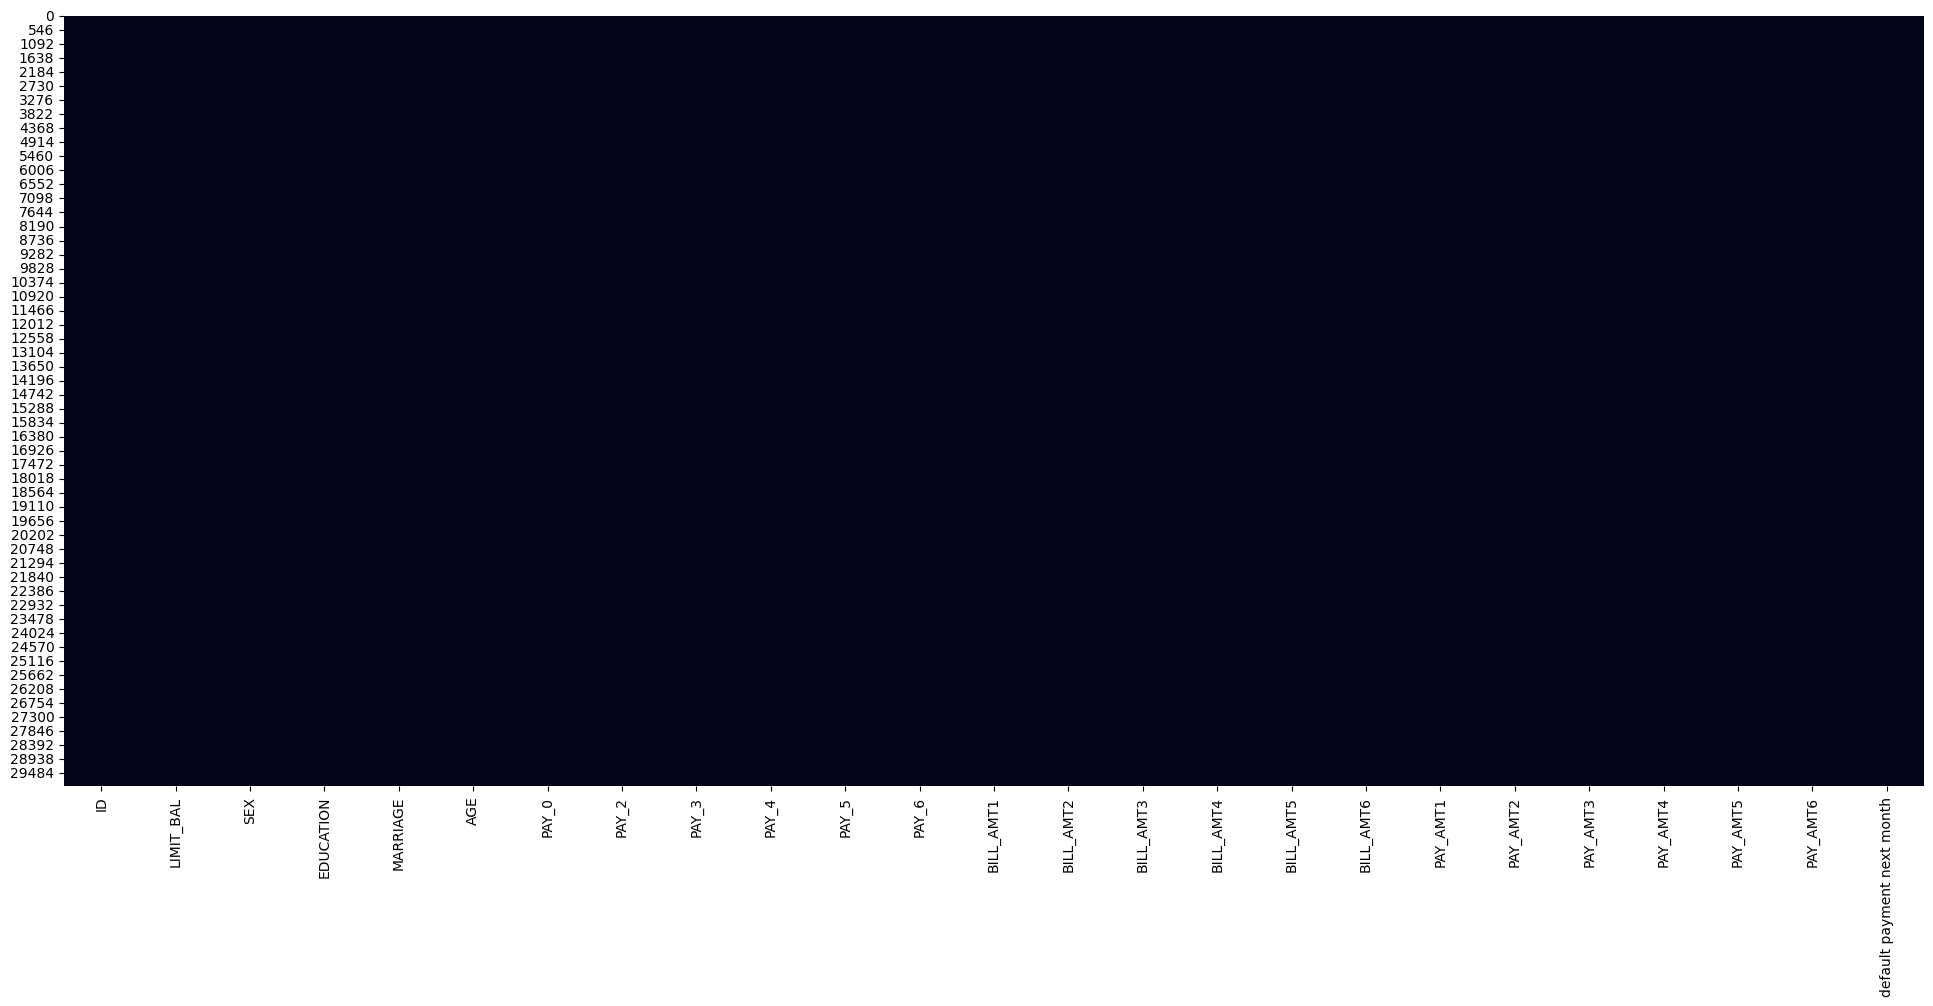

In [9]:
plt.figure(figsize=(24, 10))
sns.heatmap(data.isna(), cbar=False)
plt.show()

In [10]:
data.isnull().values.any()

False

Il n'y a pas de valeurs manquantes dans notre dataset

<a id="section12"></a>
## 1.2 Analyse univariée

### Visualisation de la distribution de la variable cible

Distribution de la variable cible: 
 default payment next month
0    23364
1     6636
Name: count, dtype: int64


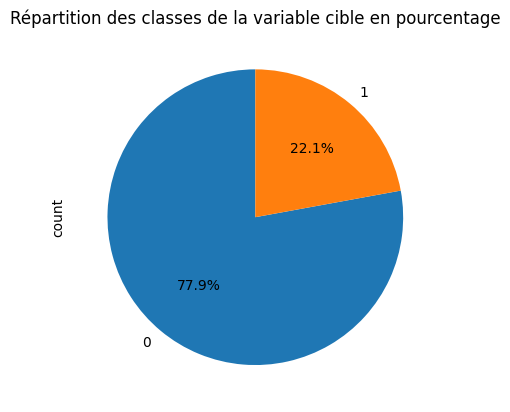

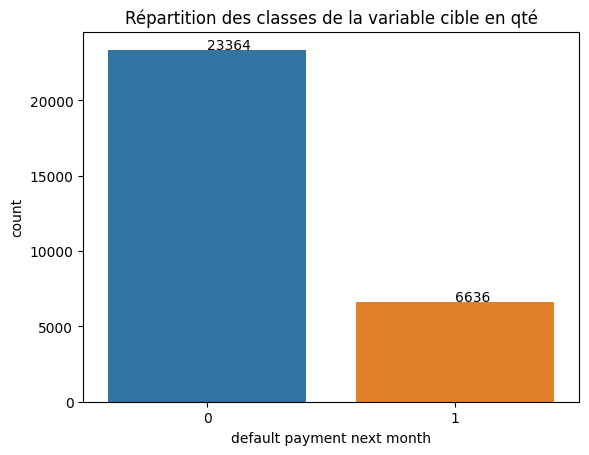

In [11]:
print("Distribution de la variable cible: \n", data['default payment next month'].value_counts())

data['default payment next month'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Répartition des classes de la variable cible en pourcentage')
plt.show()

sns.countplot(x='default payment next month', data=data)
plt.title('Répartition des classes de la variable cible en qté')
for i in range(2):
    plt.text(i, data[data['default payment next month']==i].shape[0], data[data['default payment next month']==i].shape[0])
plt.show()

### Distribution conditionnelles des features

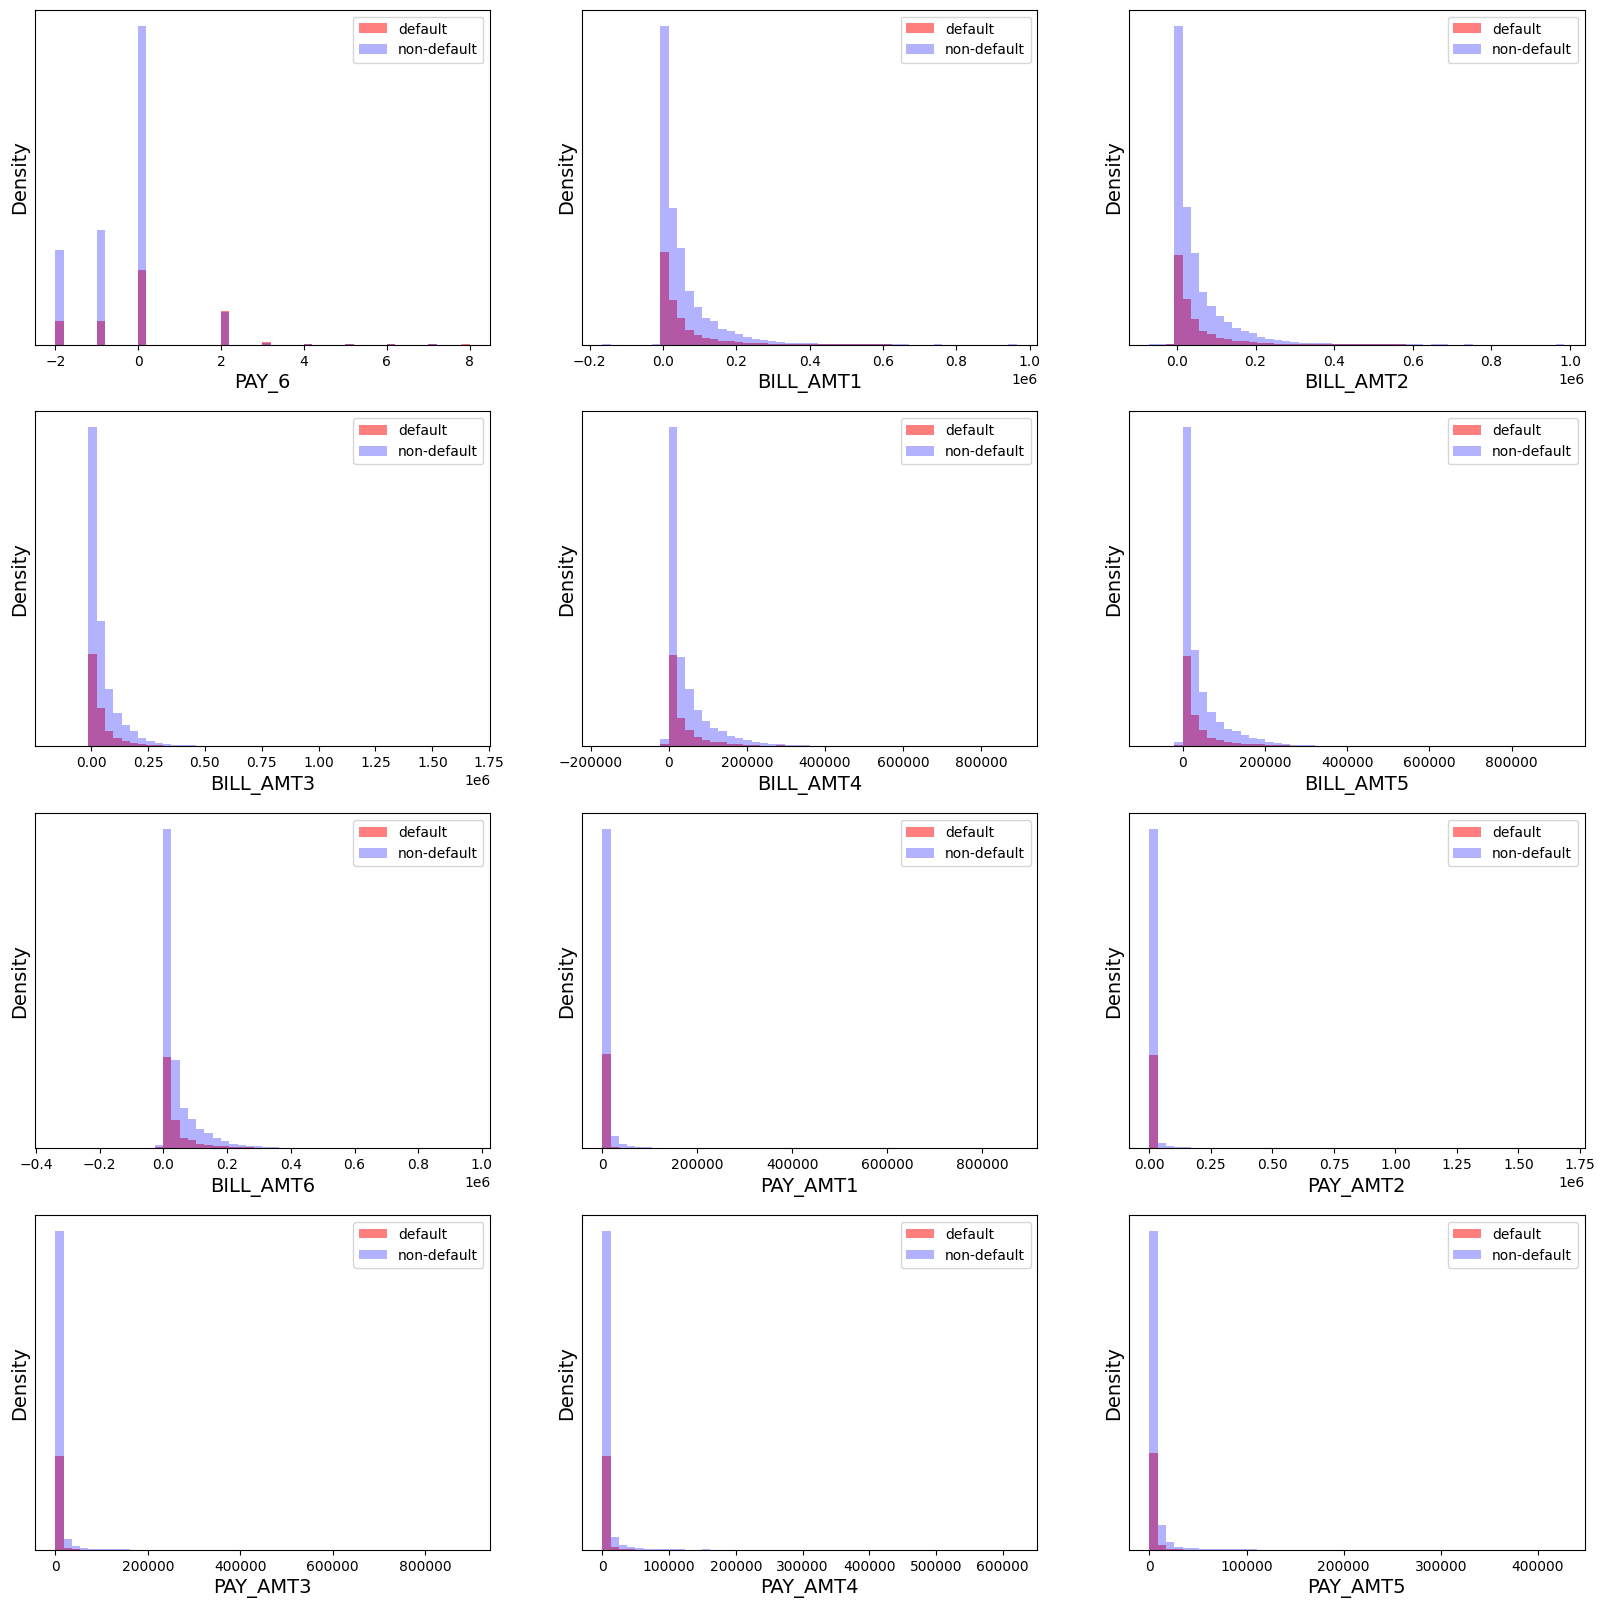

In [12]:
features = data.columns.values[11:23]

fig, axes = plt.subplots(4, 3, figsize=(20, 20))
default = data[data['default payment next month'] == 1]
not_default = data[data['default payment next month'] == 0]

axes = axes.ravel()

for i, feature in enumerate(features):
    _, bins = np.histogram(data[feature], bins=50)
    axes[i].hist(default[feature], bins=bins, color='r', alpha=.5)
    axes[i].hist(not_default[feature], bins=bins, color='b', alpha=0.3)
    axes[i].set_yticks(())
    axes[i].set_xlabel(data[feature].name, fontsize=14)
    axes[i].set_ylabel("Density", fontsize=14)
    axes[i].legend(["default", "non-default"], loc="best")

plt.show()

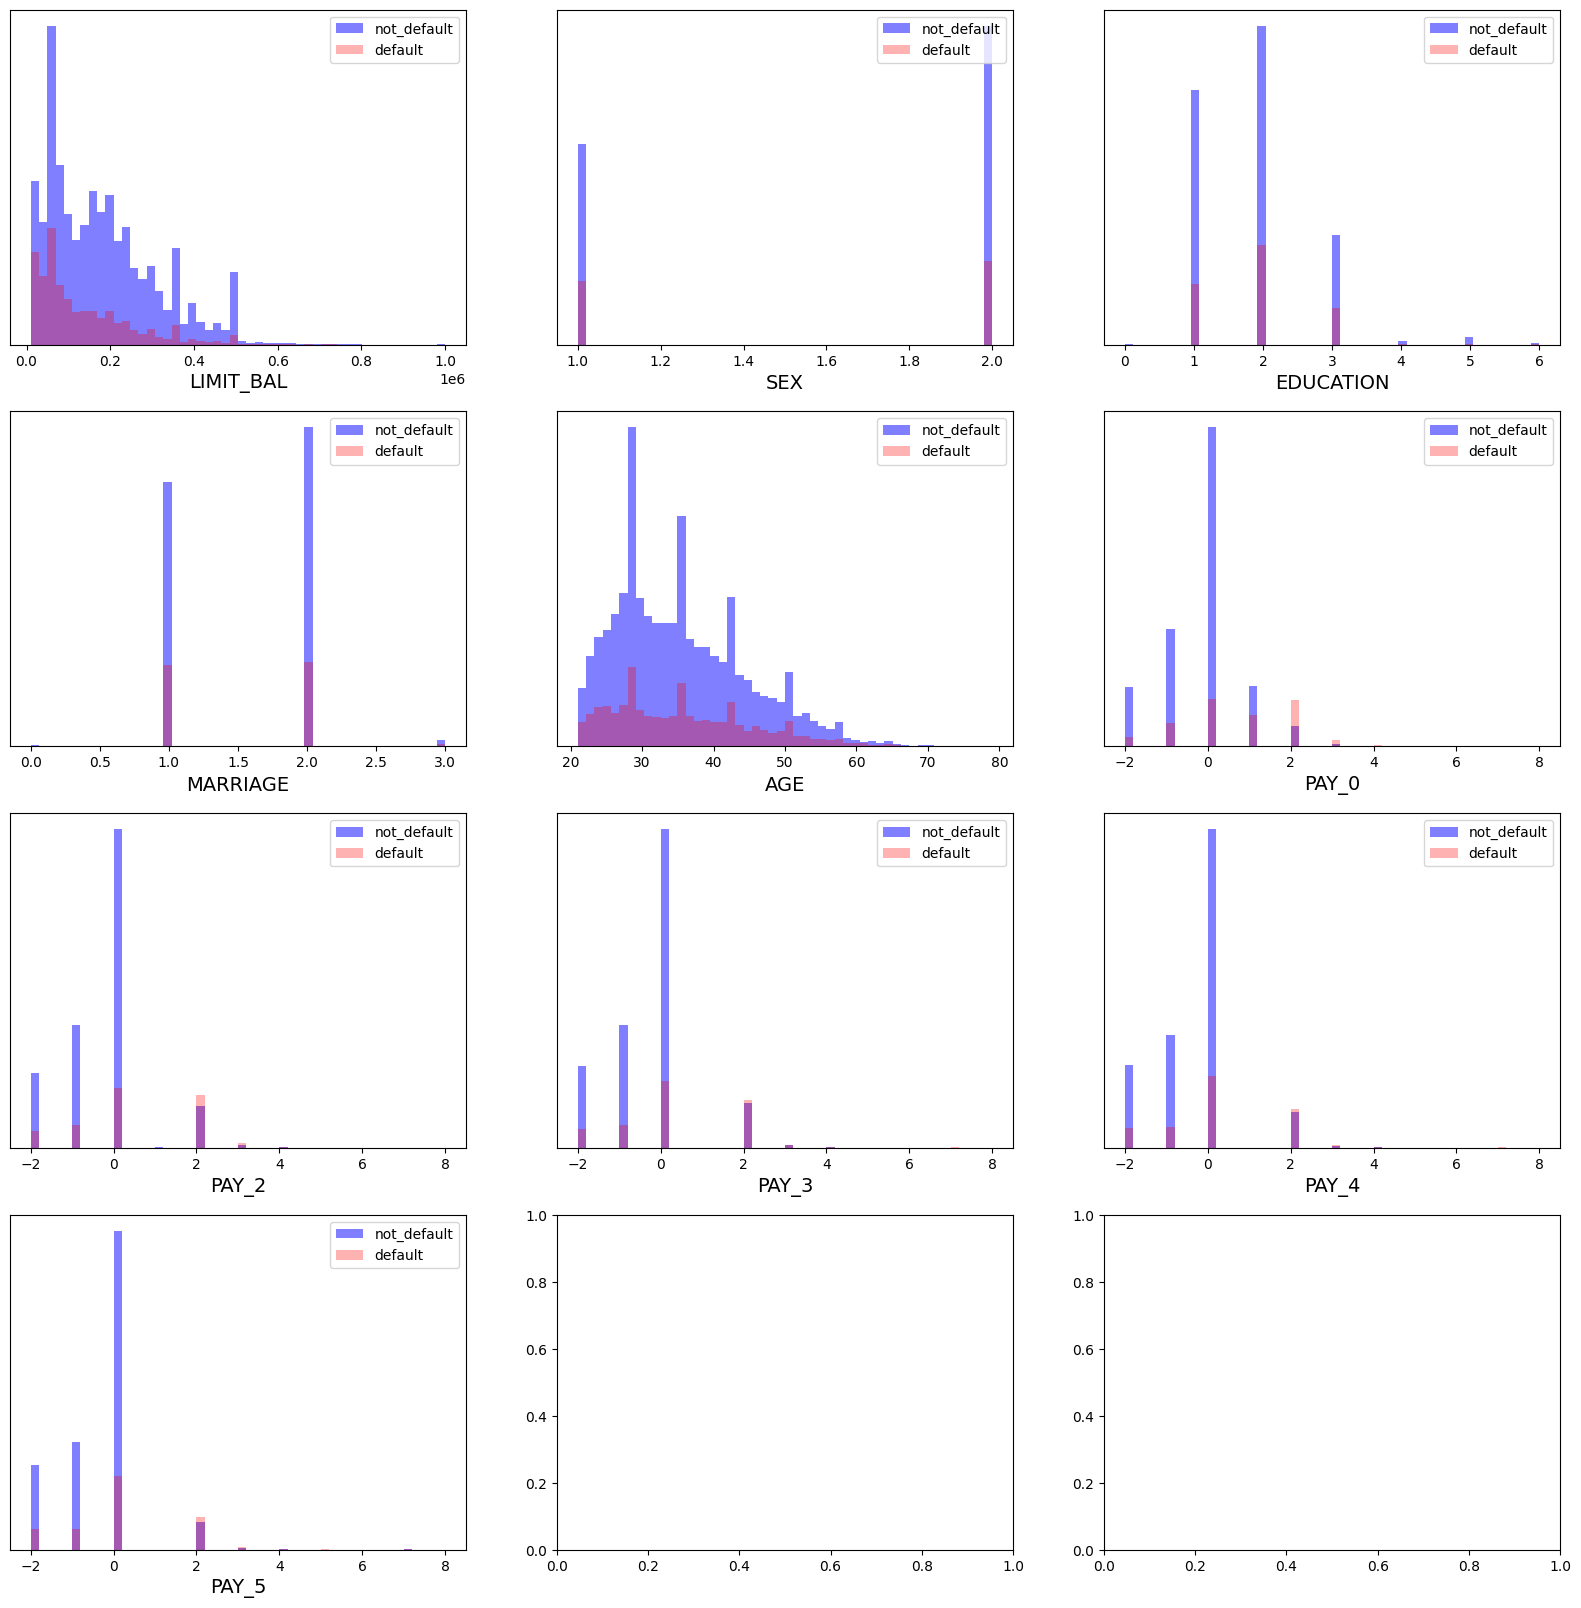

In [13]:
features = data.columns.values[1:11]

fig, axes = plt.subplots(4, 3, figsize=(20, 20))
not_default = data[data['default payment next month'] == 0]
default = data[data['default payment next month'] == 1]
ax=axes.ravel()

for i, column in enumerate(features):
    _, bins = np.histogram(data[column], bins=50)
    ax[i].hist(not_default[column], bins=bins, color='blue', alpha=.5, label='not_default')
    ax[i].hist(default[column], bins=bins, color='red', alpha=0.3, label='default')
    ax[i].set_xlabel(data[column].name, fontsize=14)
    ax[i].set_yticks(())
    ax[i].legend(loc='upper right')




<Figure size 640x480 with 0 Axes>

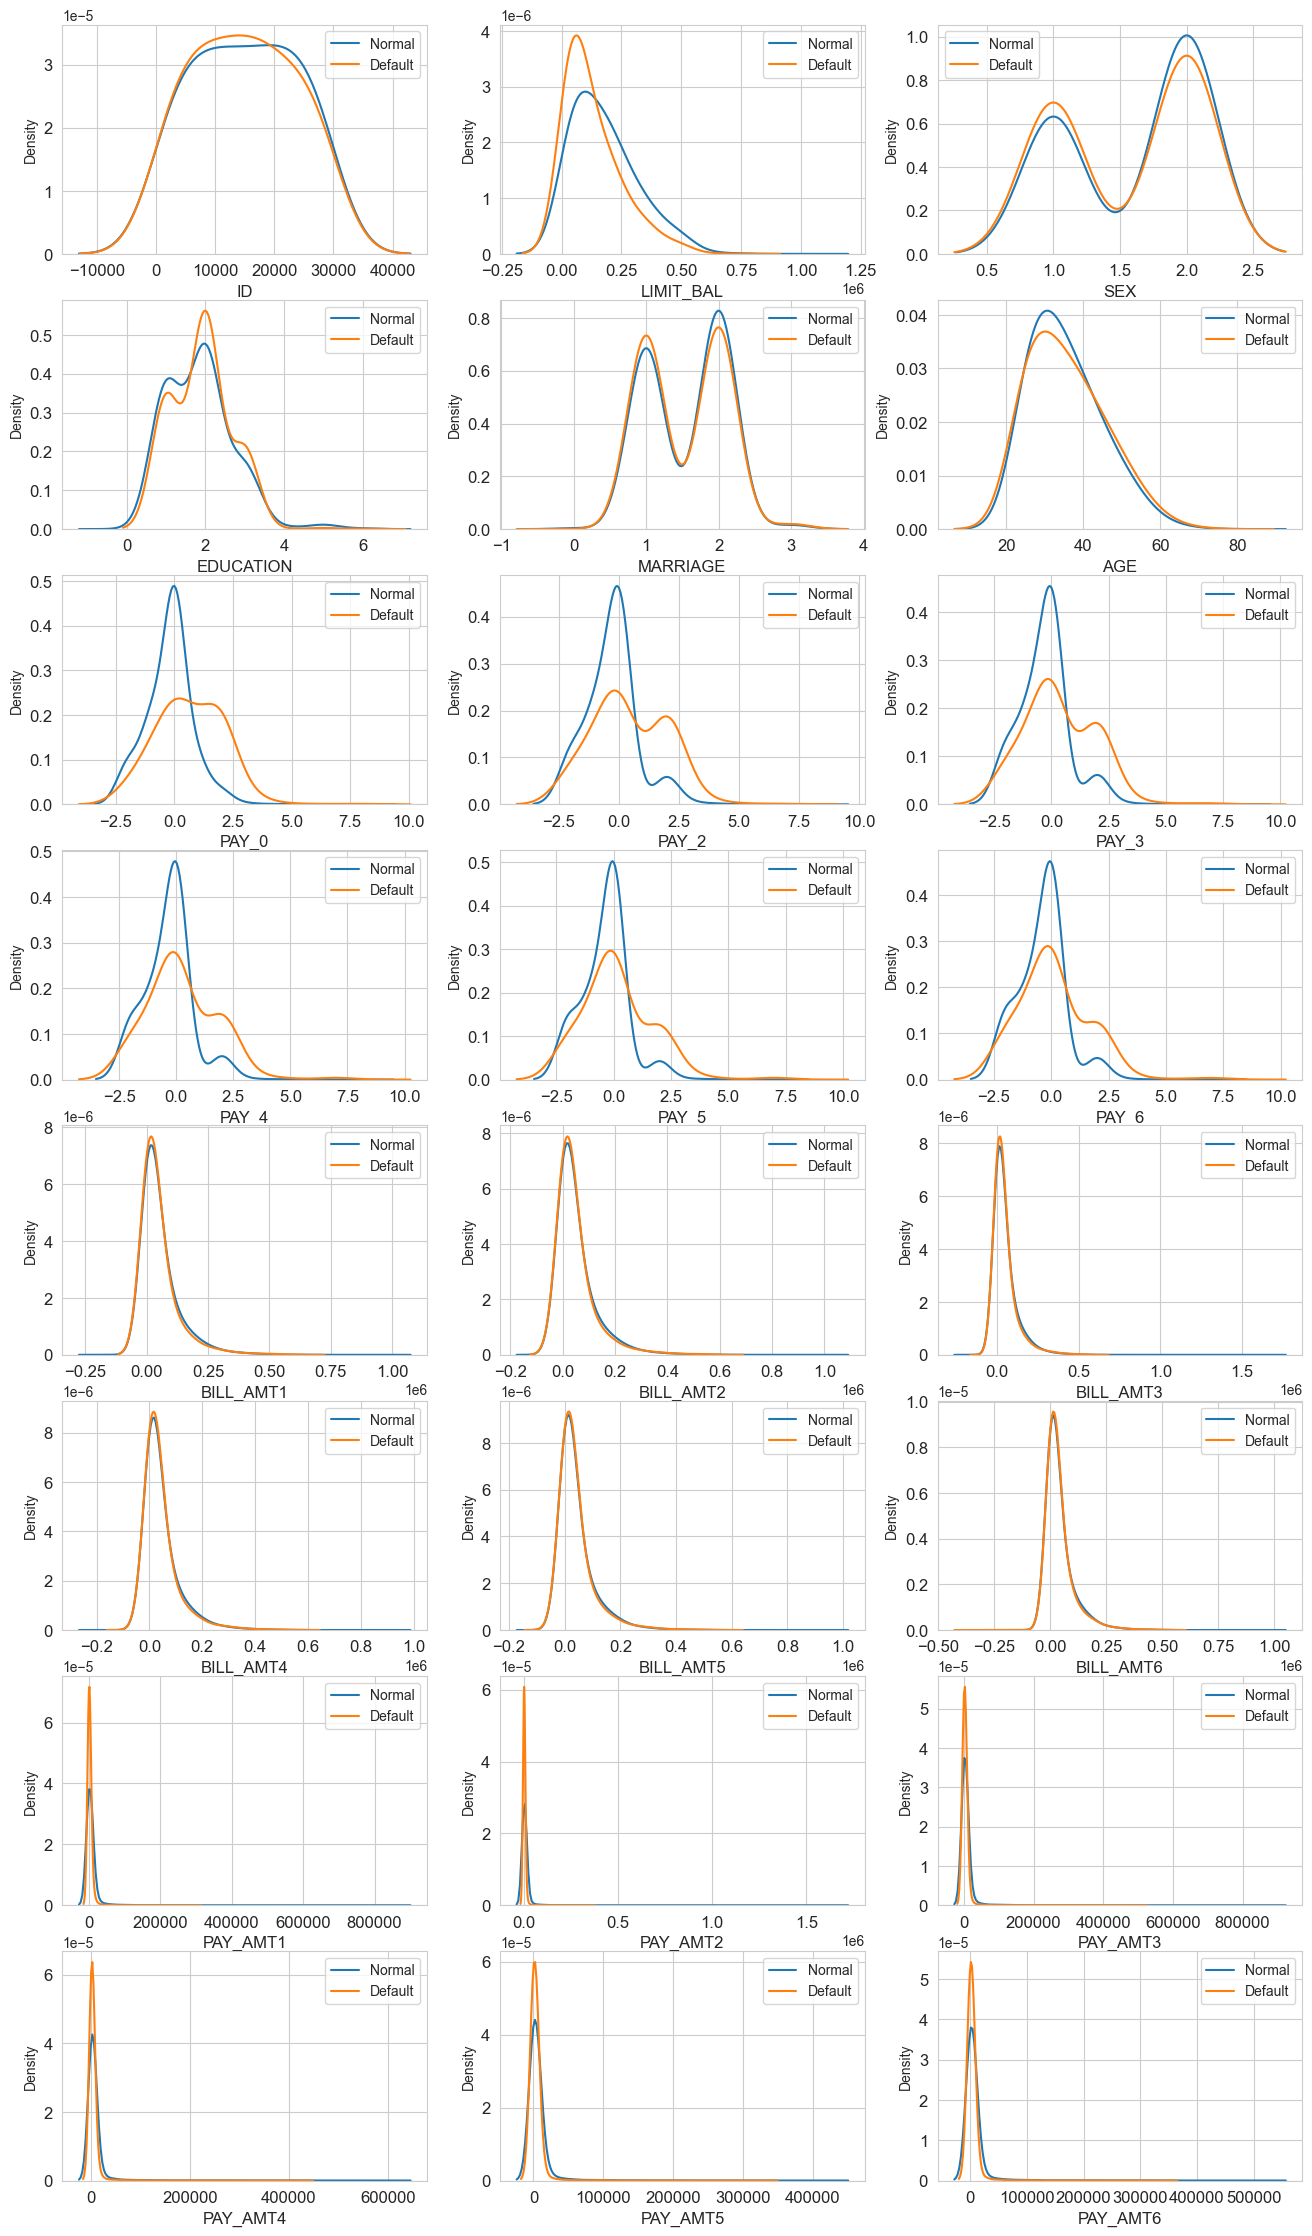

In [14]:
i = 0
not_default = data[data["default payment next month"] == 0]
default = data[data["default payment next month"] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8, 3, figsize=(16, 28))

for feature in data.columns.values[0:24]:
    i += 1
    plt.subplot(8, 3, i)
    sns.kdeplot(not_default[feature], bw=0.5, label="Normal")
    sns.kdeplot(default[feature], bw=0.5, label="Default")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend()
plt.show()


<Figure size 2300x2300 with 0 Axes>

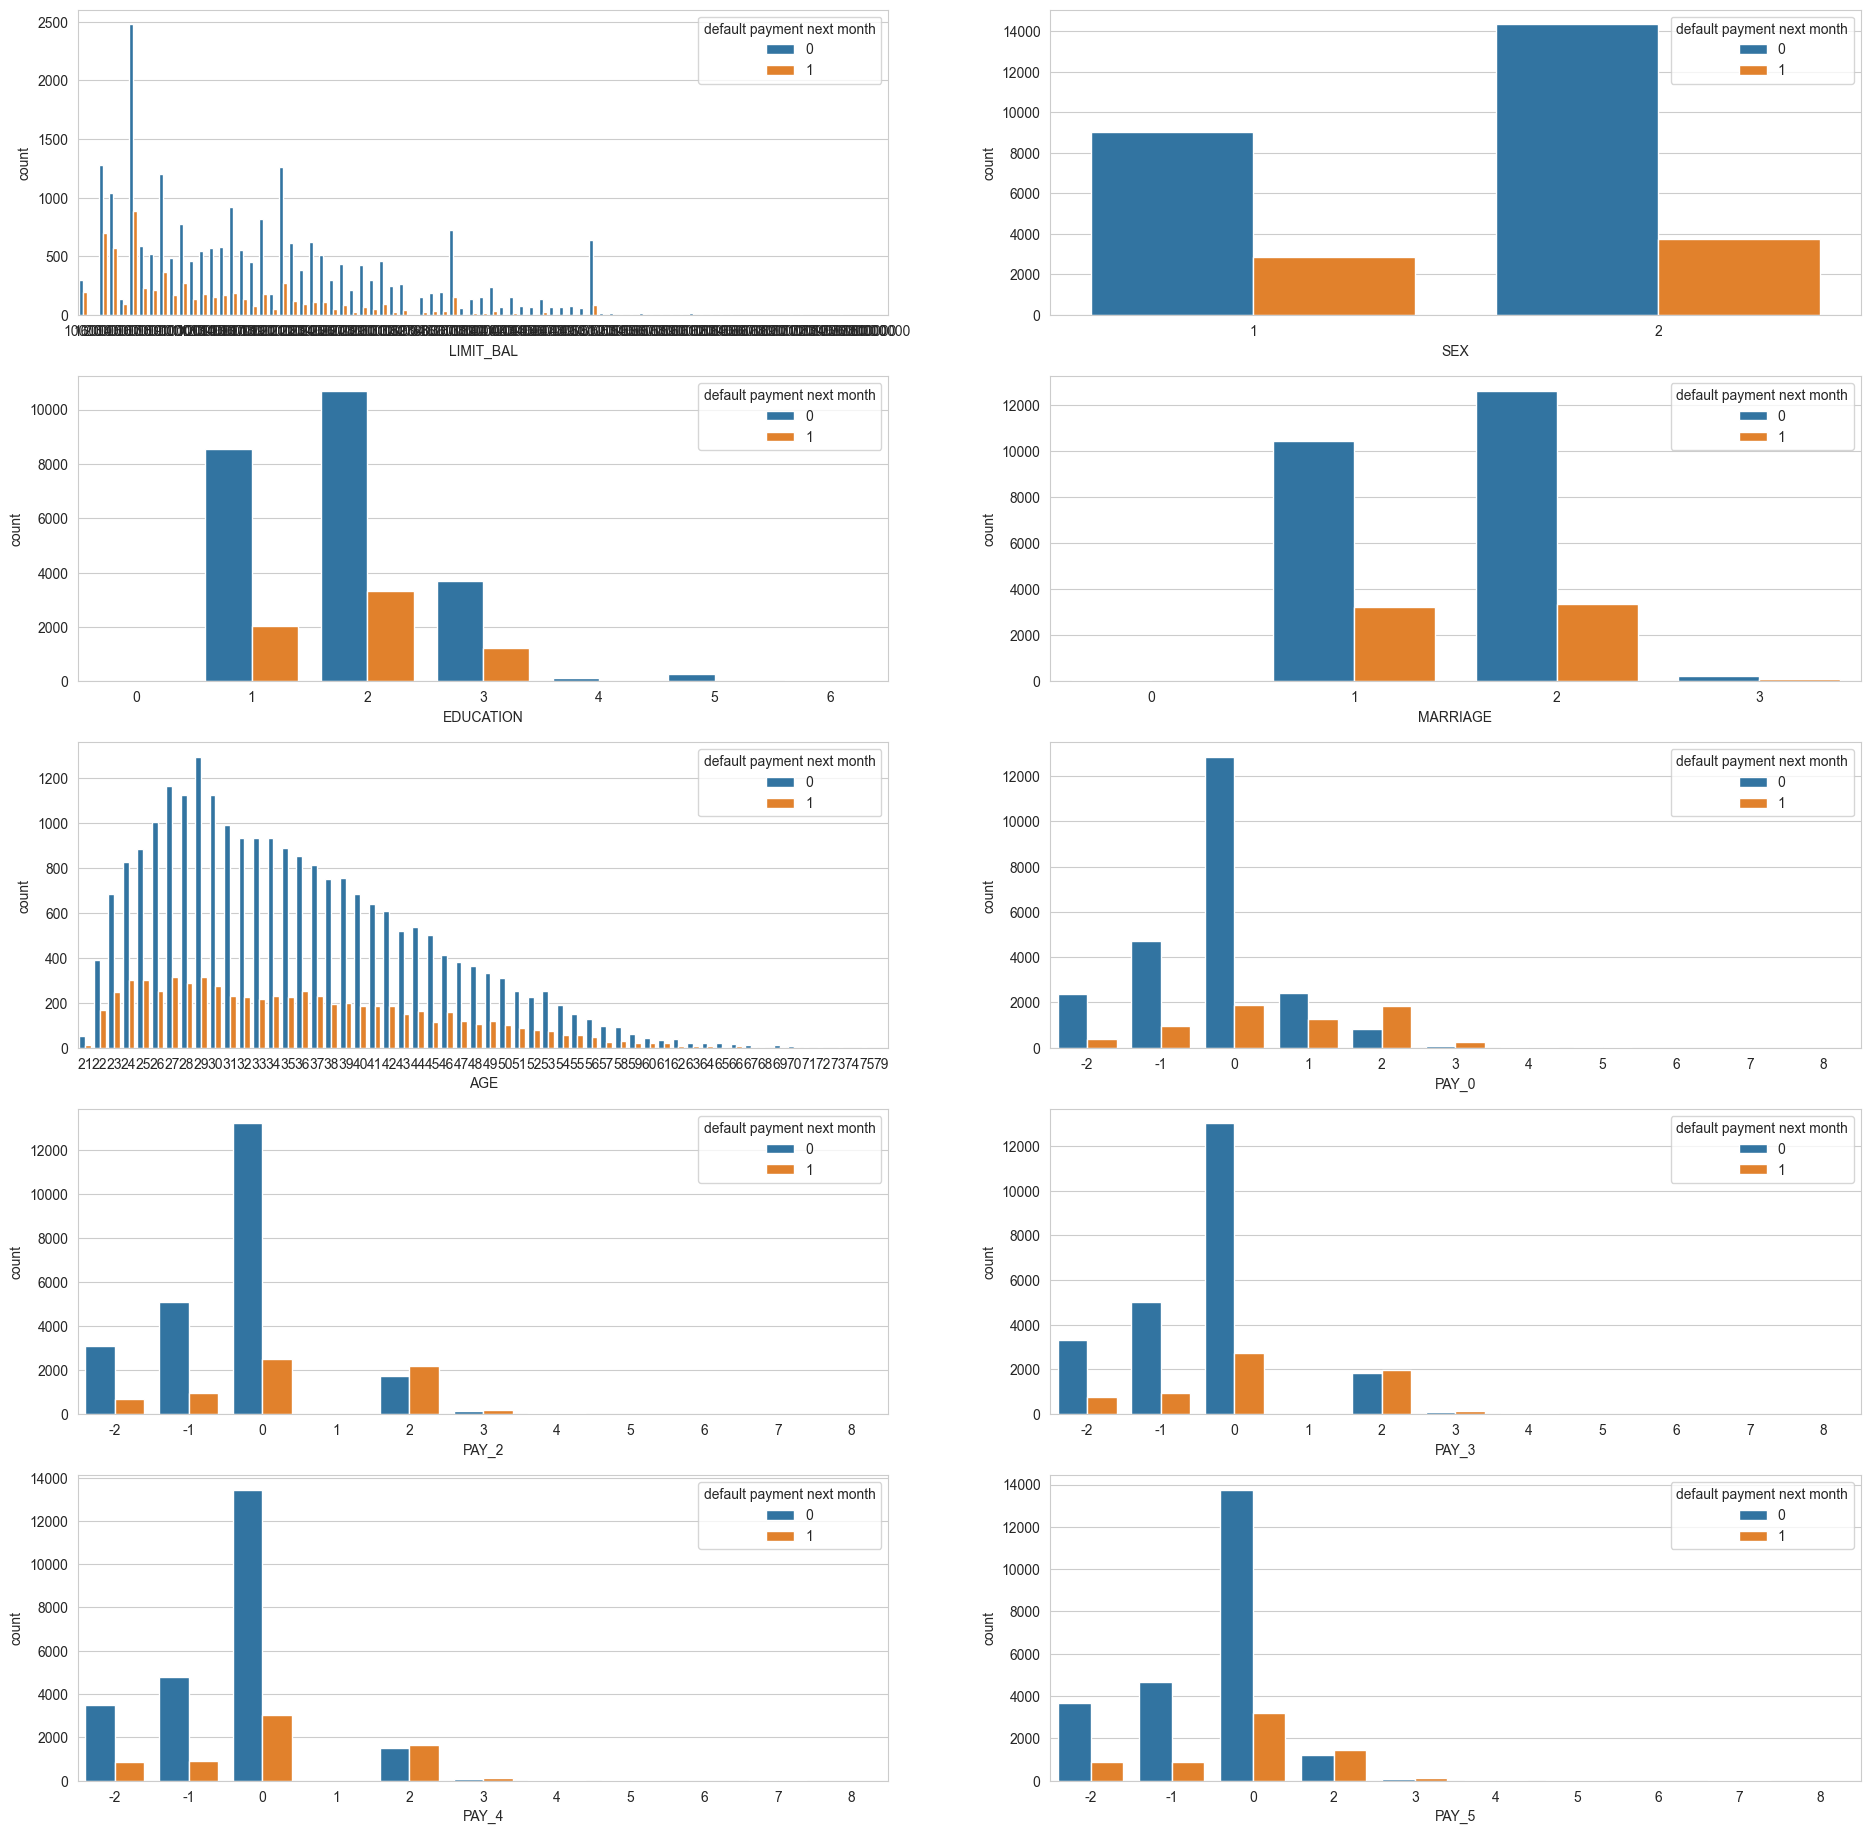

In [15]:
features = data.columns.values[1:11]
fig = plt.figure(figsize=(23, 23))
ax = plt.subplots(5, 2,  figsize=(23, 23))

for i, feature in enumerate(features):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=feature, hue='default payment next month', data=data)
    plt.xlabel(str(feature), )
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

plt.show()

### Boxplot des features en fonction de la variable cible

(array([-500000., -250000.,       0.,  250000.,  500000.,  750000.,
        1000000., 1250000., 1500000., 1750000., 2000000.]),
 [Text(0, -500000.0, '−0.50'),
  Text(0, -250000.0, '−0.25'),
  Text(0, 0.0, '0.00'),
  Text(0, 250000.0, '0.25'),
  Text(0, 500000.0, '0.50'),
  Text(0, 750000.0, '0.75'),
  Text(0, 1000000.0, '1.00'),
  Text(0, 1250000.0, '1.25'),
  Text(0, 1500000.0, '1.50'),
  Text(0, 1750000.0, '1.75'),
  Text(0, 2000000.0, '2.00')])

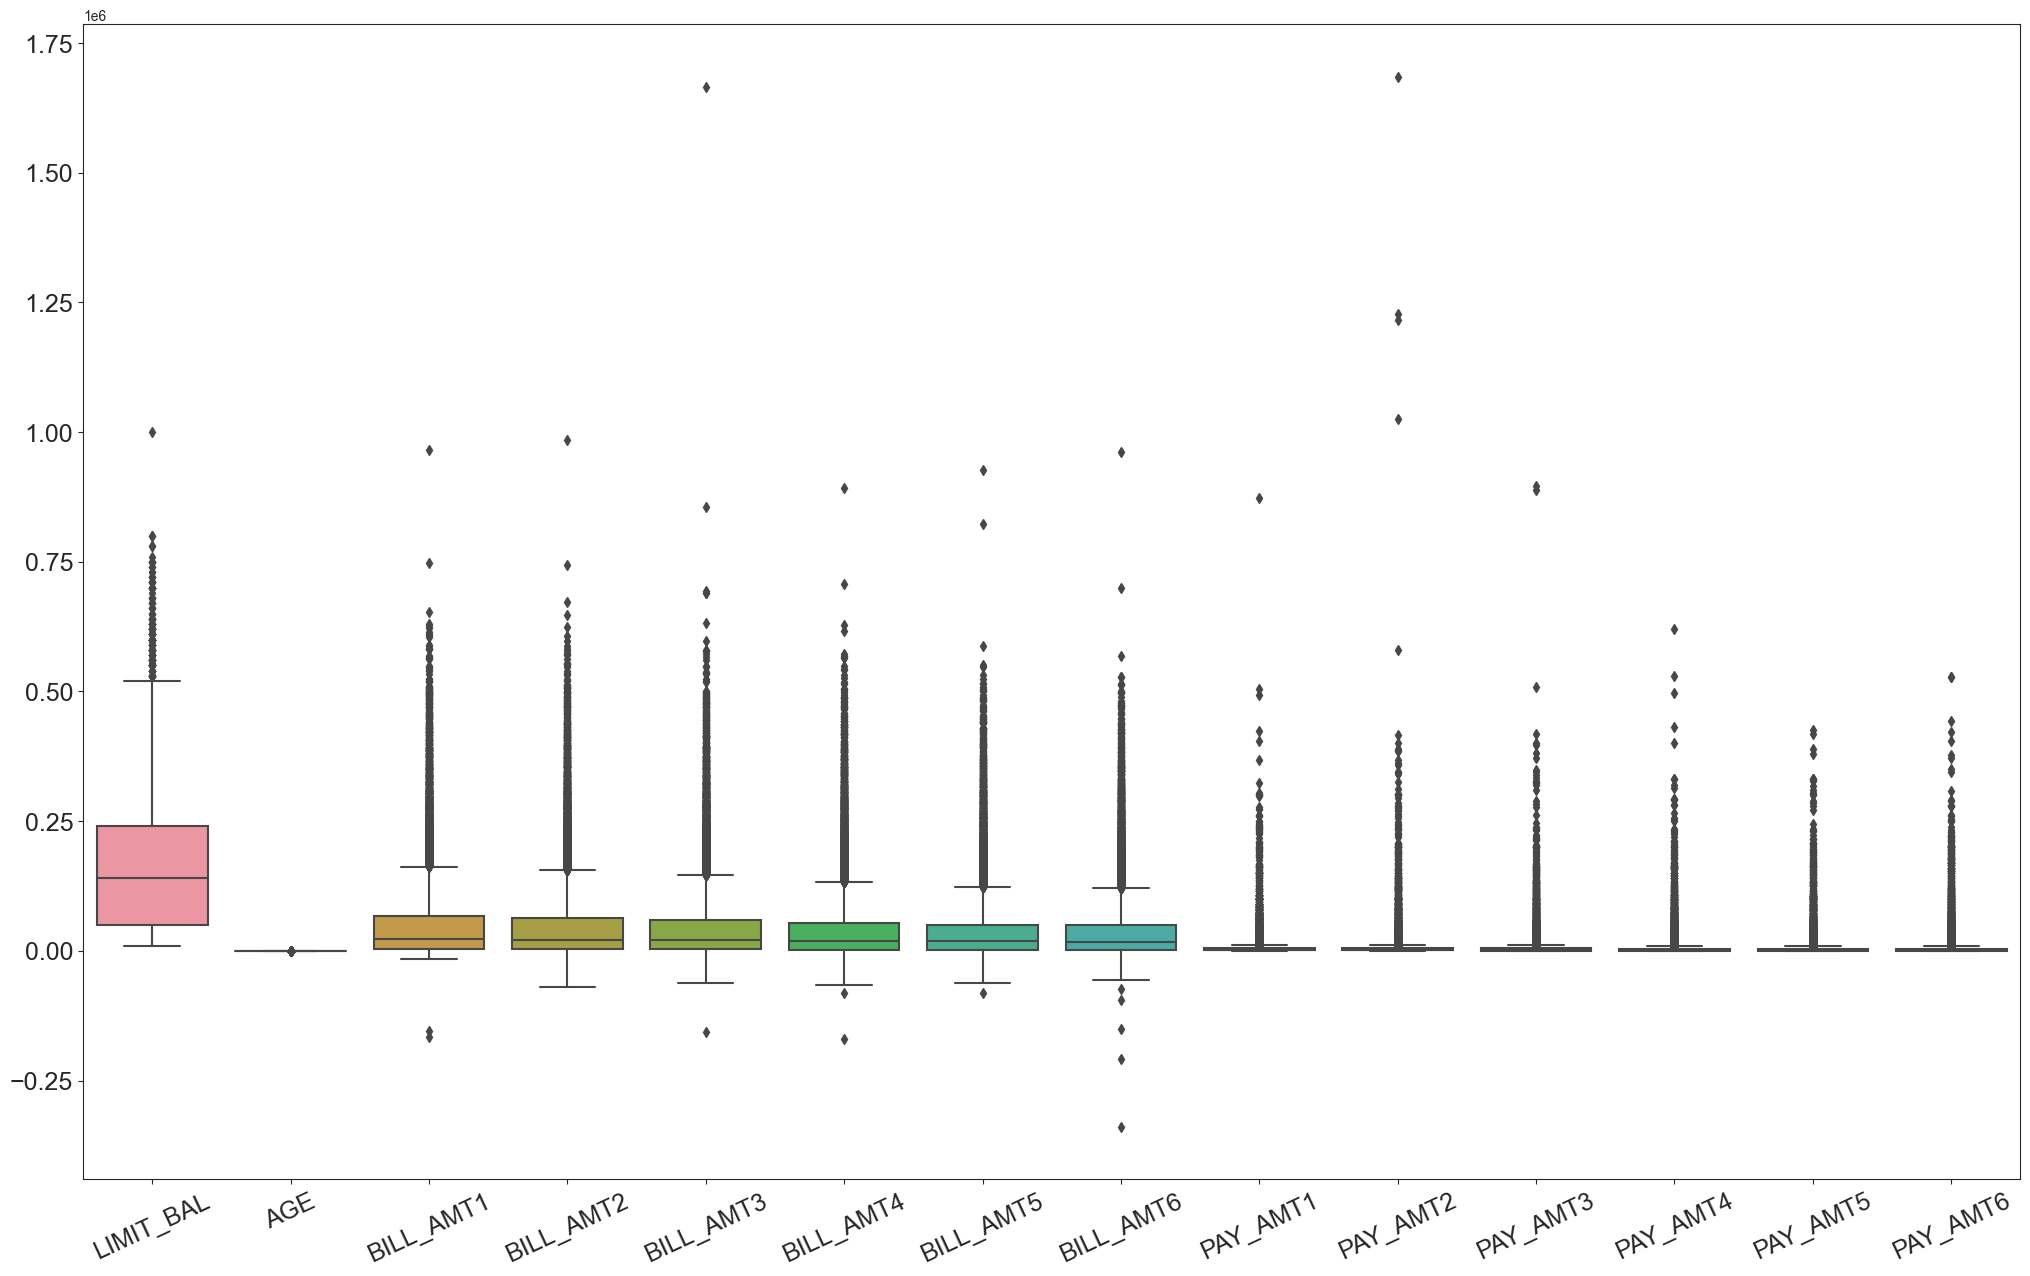

In [16]:
cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.boxplot(data=data[cols])
plt.xticks(np.arange(0,14), labels=cols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)

Nous aurions pu tracer les pairplots pour voir la relation entre les variables, mais cela prendrait beaucoup de temps car nous avons 23 variables. Nous allons donc tracer les pairplots pour les 5 premières variables et les 5 dernières variables.

## Visualisation de la matrice de corrélation

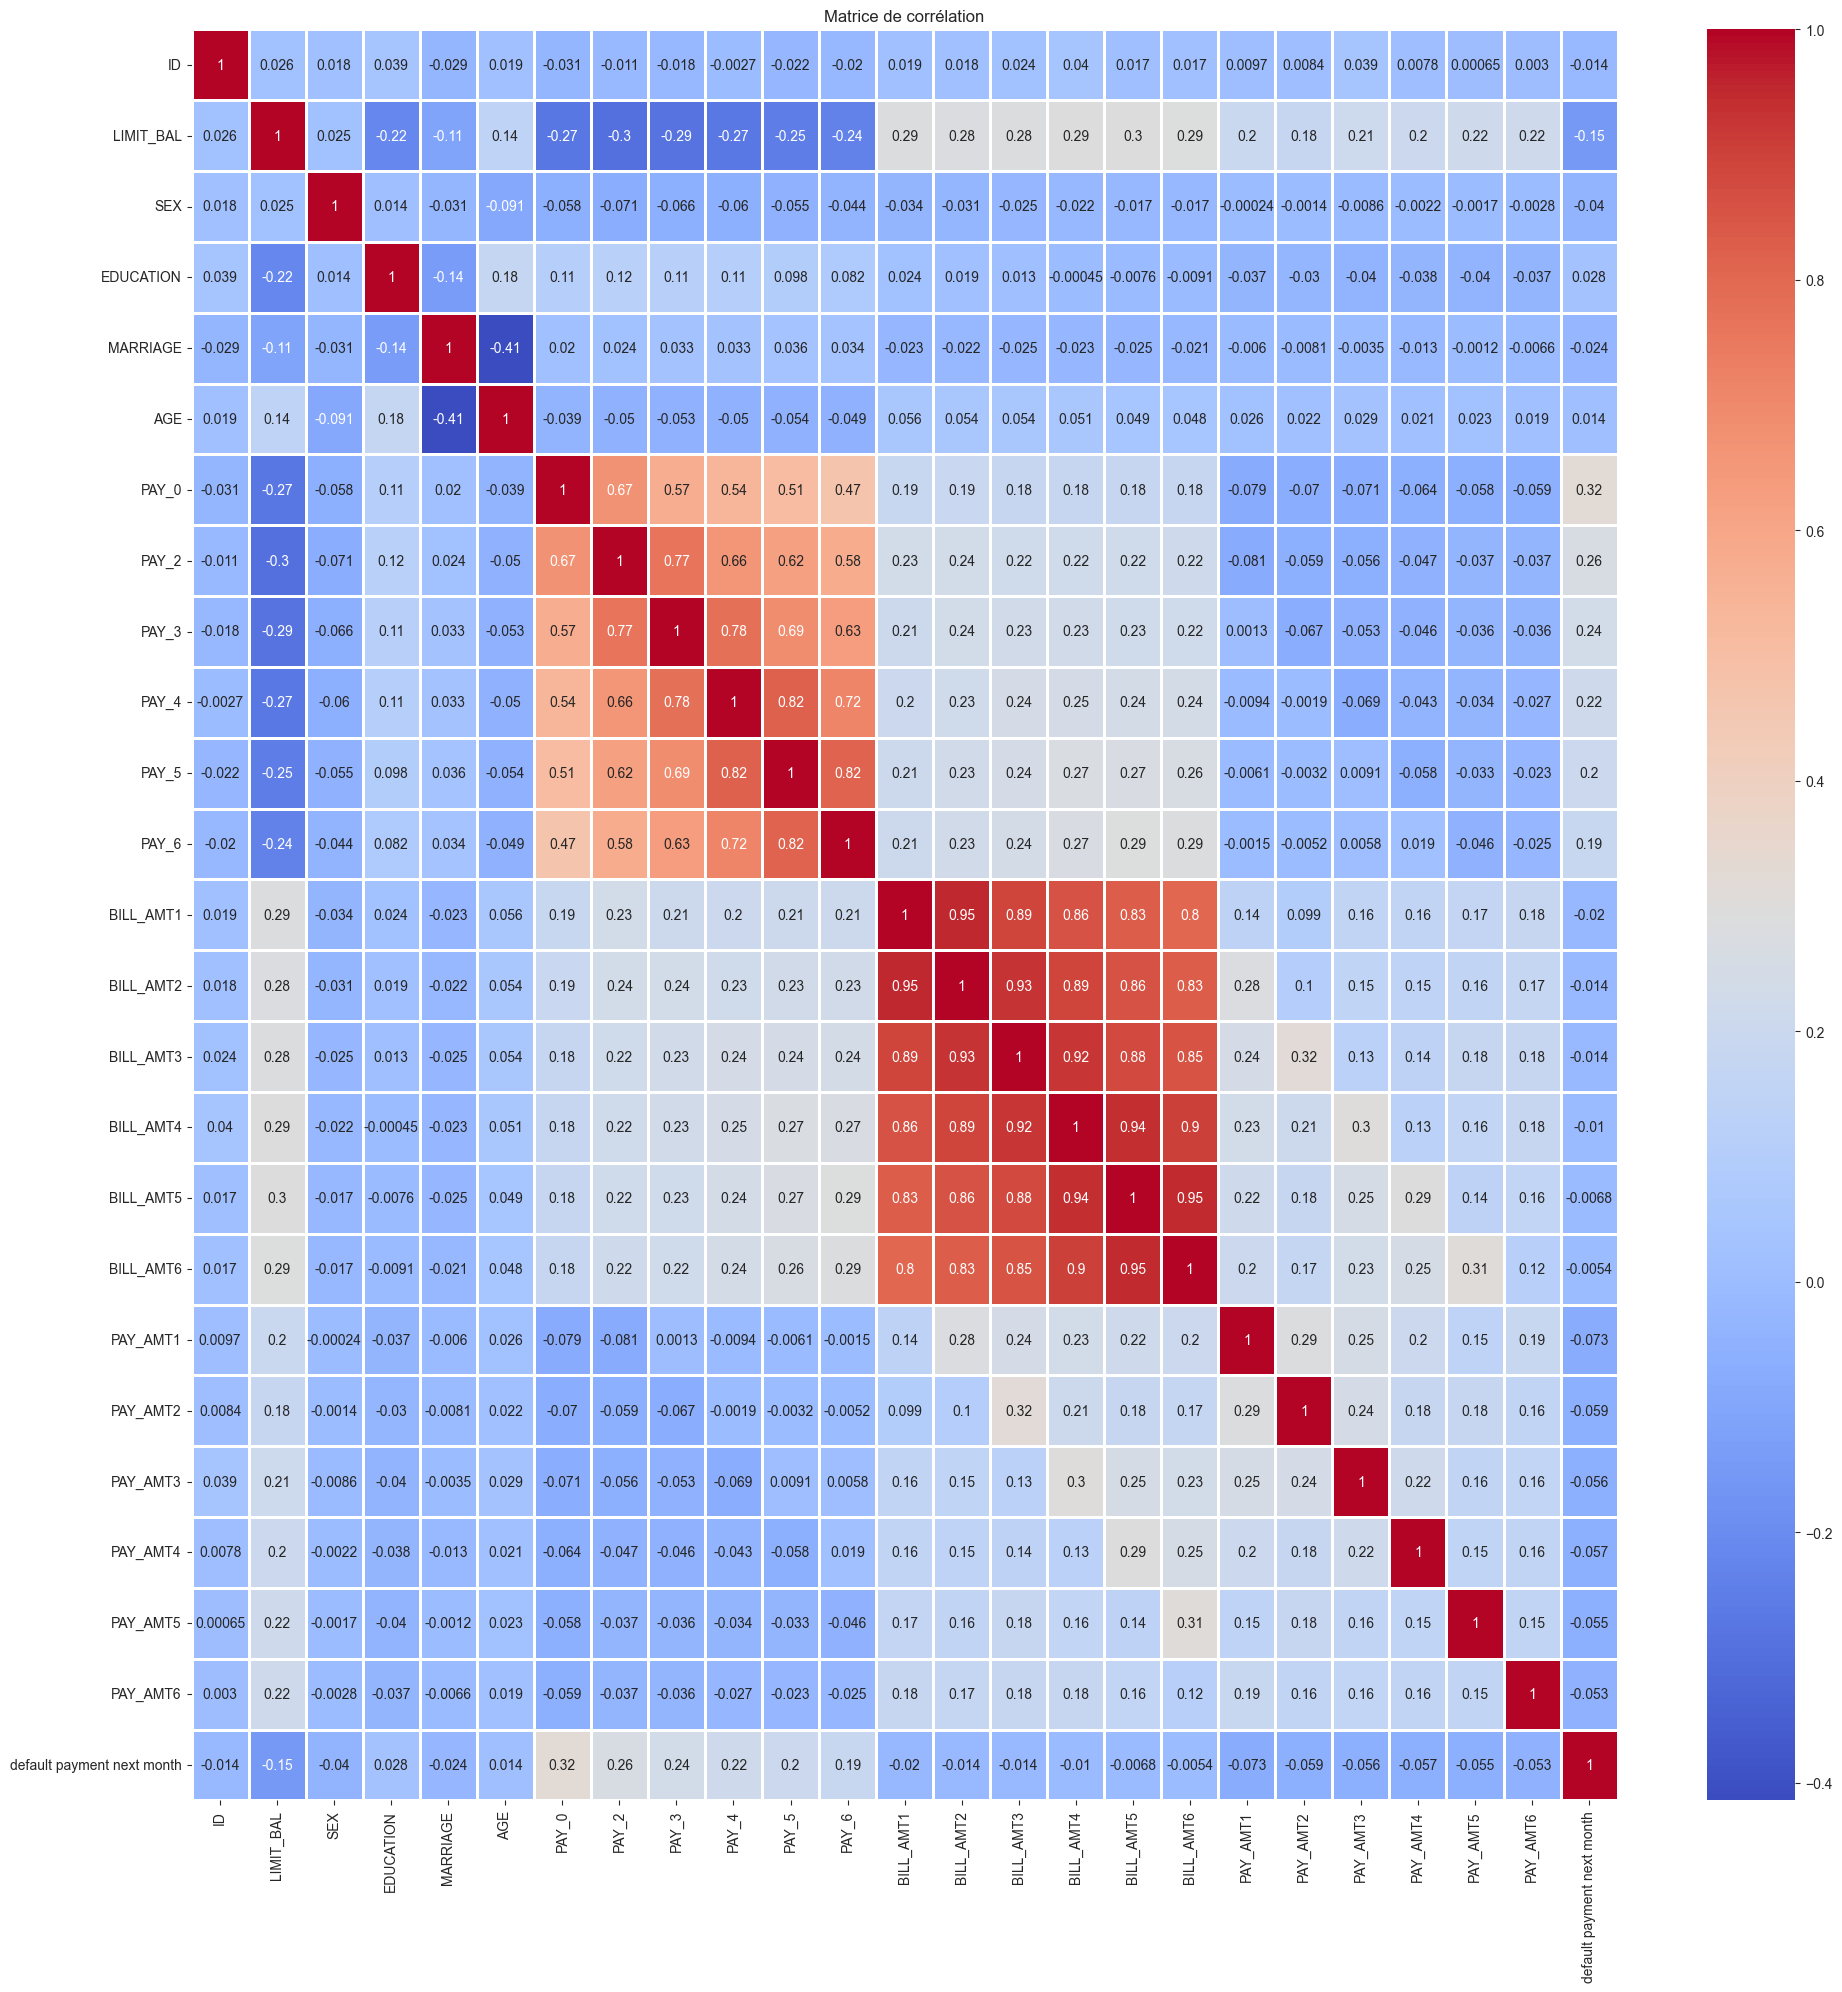

In [17]:
plt.figure(figsize = (23,23))
sns.heatmap(data.corr(), cmap = "coolwarm", linewidth = 2, linecolor = "white", annot=True)
plt.title("Matrice de corrélation")
plt.show()

<Figure size 2300x2300 with 0 Axes>

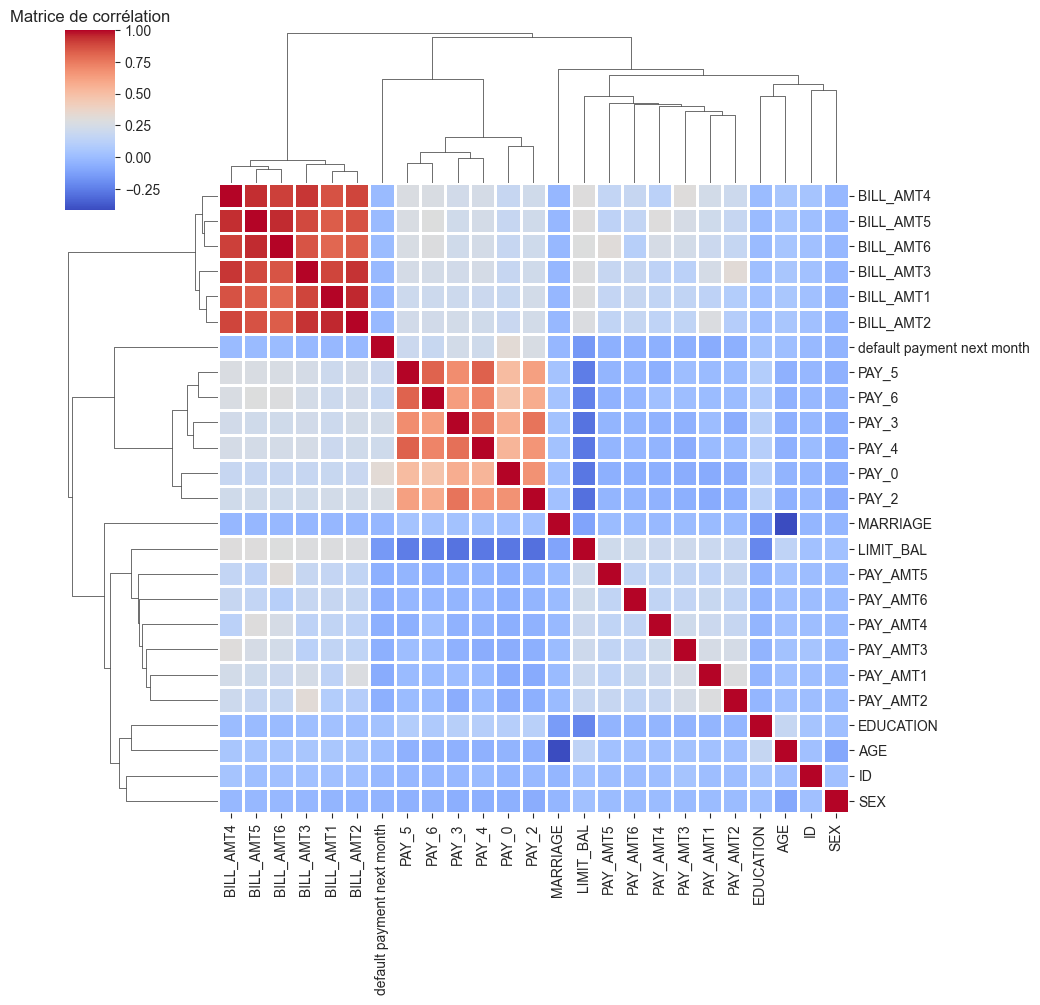

In [18]:
# HeatMap
plt.figure(figsize = (23,23))
sns.clustermap(data.corr(), cmap = "coolwarm", linewidth = 2, linecolor = "white")
plt.title("Matrice de corrélation")
plt.show()

<a id="section2"></a>
# 2. Pré-traitement des données

Le pré-traitement des données consiste à nettoyer les données, à les transformer et à les réduire. Il est nécessaire de le faire pour améliorer la qualité des données et pour faciliter l'analyse des données.



### Nettoyage et Ajustement des données

On remarque que nous avons une colonne ID qui ne nous sera pas utile pour la suite et que la numerotation de la feature PAY_X commence à 0 et non à 1

In [19]:
data.drop('ID', axis=1, inplace=True)

In [20]:
data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

Les colonnes `PAY_n` ont un minimum en -2 (non documenté) et un maximum égal à 8. Il est donc necessaire de redimensionner ces colonnes.

In [21]:
data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


`PAY_n` ne doit contenir que les valeurs suivantes :  ``-1,1,2,3,4,5,6,7,8,9``
On remplace donc les valeurs inférieures à -1 par -1 et incrémenter les valeurs supérieures ou égales à 0 de 1.

In [22]:
for att in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  filter = (data[att] == -2) | (data[att] == -1) 
  data.loc[filter, att] = -1

  data[att] = data[att].astype('int64')
  filter = (data[att] >= 0)
  data.loc[filter, att] = data.loc[filter, att] + 1


In [23]:
data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.793767,0.664567,0.635867,0.589767,0.549167,0.517567
std,1.337645,1.394148,1.386123,1.347591,1.306001,1.322302
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


Concernant la variable `MARIAGE`, on remarque que la valeur `0` est non documentée. On va donc supprimer ces observations.

In [24]:
data = data.drop(data[data['MARRIAGE']==0].index)

Les catégories 0, 5 et 6 sont non documentées pour la variable `EDUCATION`. On va donc supprimer ces observations.

In [25]:
data = data.drop(data[data['EDUCATION']==0].index)
data = data.drop(data[data['EDUCATION']==5].index)
data = data.drop(data[data['EDUCATION']==6].index)

In [26]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,3,3,-1,-1,-1,-1,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,3,1,1,1,3,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,1,1,1,1,1,1,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,1,1,1,1,1,1,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,1,-1,1,1,1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Standardisation des données

On remarque que les données ne sont pas standardisées. Beaucoup de valeurs sont comprises entre 0 et 1 mais certaines valeurs sont très élevées. Nous allons donc standardiser les données.

In [27]:
def preprocessing(data):
    X = data.copy()
    scaler = MinMaxScaler()
    X['LIMIT_BAL'] = scaler.fit_transform(X['LIMIT_BAL'].values.reshape(-1, 1))
    X['AGE'] = scaler.fit_transform(X['AGE'].values.reshape(-1, 1))

    for i in range(1,7):
        scaler = MinMaxScaler()
        X['PAY_' + str(i)] = scaler.fit_transform(X['PAY_' + str(i)].values.reshape(-1, 1))

    for i in range(1,7):
        scaler = MinMaxScaler()
        X['BILL_AMT' + str(i)] = scaler.fit_transform(X['BILL_AMT' + str(i)].values.reshape(-1, 1))

    for i in range(1,7):
        scaler = MinMaxScaler()
        X['PAY_AMT' + str(i)] = scaler.fit_transform(X['PAY_AMT' + str(i)].values.reshape(-1, 1))



    
    X = X.drop('default payment next month', axis=1)
    y = data['default payment next month']
    features = X.columns
    
    # scaler = StandardScaler()
    # X.loc[:, features] = scaler.fit_transform(X.loc[:, features])
    return X, y

Text(0.5, 1.0, 'Boxplot')

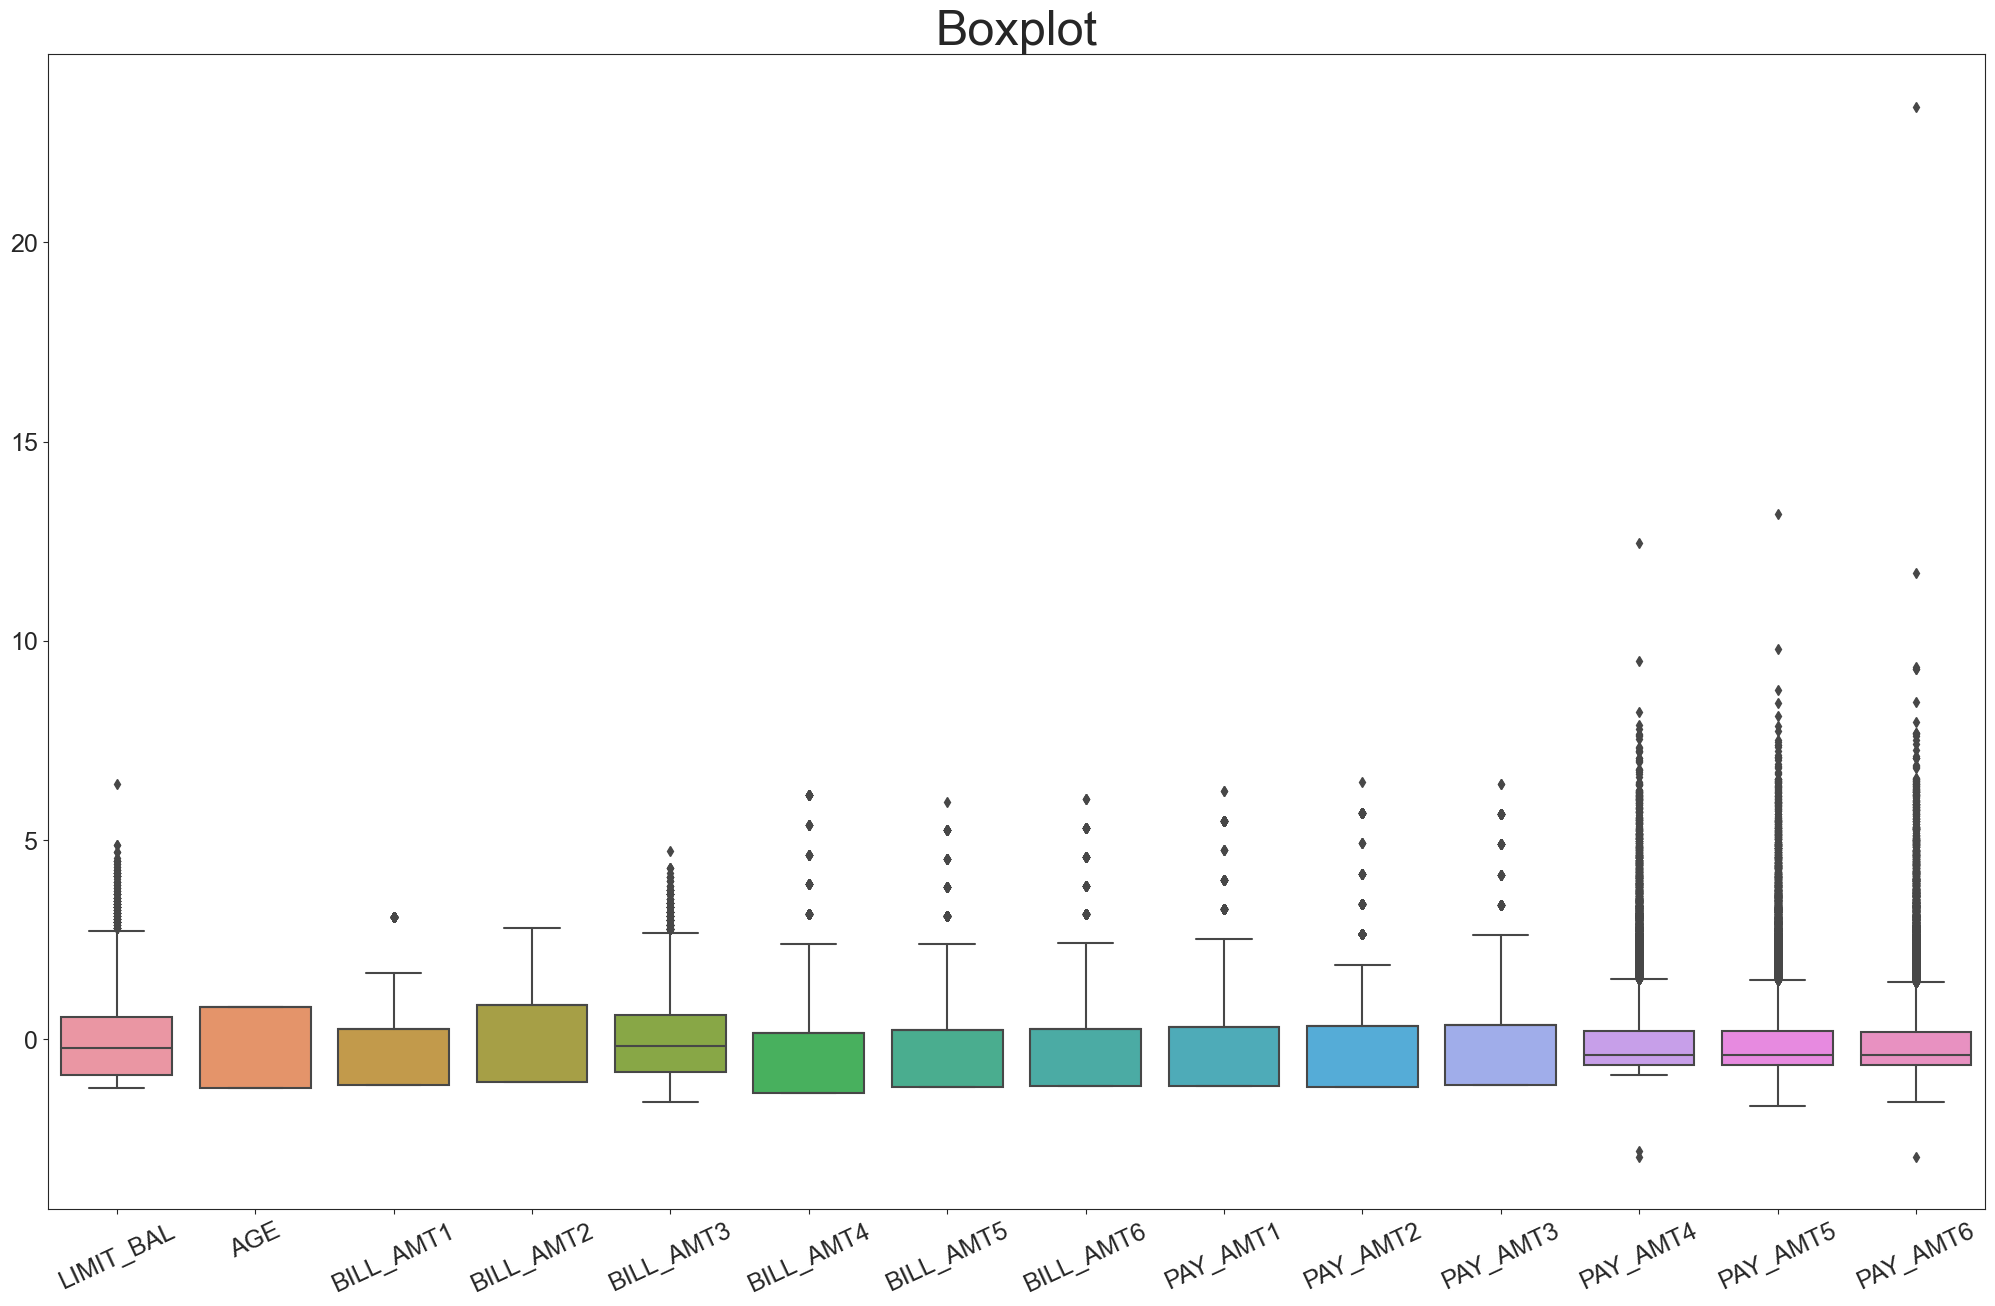

In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.boxplot(data=scaled_data[:,:-10])
plt.xticks(np.arange(0,14), labels=cols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)
plt.title('Boxplot', fontsize= 35)

In [29]:
# Category
for att in ['SEX', 'EDUCATION', 'MARRIAGE']:
  data[att] = data[att].astype('category')

# one-hot
data=pd.concat([pd.get_dummies(data['SEX'], prefix='SEX'),
                pd.get_dummies(data['EDUCATION'], prefix='EDUCATION'), 
                pd.get_dummies(data['MARRIAGE'], prefix='MARRIAGE'),
                data],axis=1)

data.drop(['EDUCATION'],axis=1, inplace=True)
data.drop(['SEX'],axis=1, inplace=True)
data.drop(['MARRIAGE'],axis=1, inplace=True)

data.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,True,False,True,False,False,True,False,False,20000,24,3,3,-1,-1,-1,-1,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,False,True,False,True,False,False,False,True,False,120000,26,-1,3,1,1,1,3,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,False,True,False,True,False,False,False,True,False,90000,34,1,1,1,1,1,1,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,False,True,False,True,False,False,True,False,False,50000,37,1,1,1,1,1,1,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,True,False,False,True,False,False,True,False,False,50000,57,-1,1,-1,1,1,1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Separation des données 
80% des données pour l'entrainement et 20% pour le test

In [30]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=0)

print("Dimensions des données train: {}".format(data_train.shape))
print("Dimensions des données test: {}".format(data_test.shape))

Dimensions des données train: (23680, 30)
Dimensions des données test: (5921, 30)


### Separation de la variable cible et des variables explicatives
Il faut séparer la variable cible des variables explicatives pour pouvoir entrainer le modèle.

In [31]:
X_train, y_train = preprocessing(data_train)
X_test, y_test = preprocessing(data_test)

print("Dimensions des données X_train: {}".format(X_train.shape))
print("Dimensions des données y_train: {}".format(y_train.shape))

Dimensions des données X_train: (23680, 29)
Dimensions des données y_train: (23680,)


Redimensionnement des données cibles pour pouvoir les utiliser dans le modèle

In [32]:
y_train = y_train.values.reshape(-1, 1)
print("Dimensions des données train: {}".format(y_train.shape))

Dimensions des données train: (23680, 1)


Description des données d'entrainement

In [33]:
X_train.describe()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000,23680.000000
mean,0.159030,0.248930,0.179519,0.167268,0.163813,0.159096,0.155190,0.152445,0.191559,0.112669,0.062715,0.200738,0.120500,0.290770,0.006499,0.003489,0.005880,0.007817,0.011137,0.009874
std,0.130941,0.158560,0.133969,0.139485,0.138467,0.135536,0.131445,0.133054,0.064559,0.067178,0.040026,0.060421,0.060003,0.045666,0.019207,0.013545,0.020296,0.025602,0.035018,0.033475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040404,0.120690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149705,0.069058,0.037199,0.162336,0.082422,0.261971,0.001134,0.000494,0.000436,0.000467,0.000534,0.000270
50%,0.131313,0.224138,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.166393,0.086399,0.047250,0.178036,0.098589,0.274180,0.002414,0.001194,0.002022,0.002415,0.003517,0.002837
75%,0.232323,0.344828,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.205353,0.126673,0.070235,0.211318,0.130316,0.298771,0.005729,0.002969,0.005022,0.006503,0.009563,0.007572
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
X_train.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
20202,False,True,True,False,False,False,True,False,False,0.222222,0.241379,0.0,0.0,0.0,0.0,0.0,0.0,0.154483,0.066220,0.035643,0.160138,0.080648,0.260979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14829,False,True,True,False,False,False,False,True,False,0.070707,0.103448,0.2,0.2,0.2,0.2,0.2,0.2,0.214041,0.138318,0.080537,0.216814,0.137637,0.306177,0.004121,0.002122,0.002567,0.003704,0.005392,0.004161
5846,False,True,True,False,False,False,True,False,False,0.080808,0.379310,0.2,0.2,0.2,0.2,0.4,0.4,0.197881,0.124572,0.071886,0.236555,0.160046,0.324357,0.005727,0.002969,0.022320,0.000016,0.023689,0.000165
15916,False,True,False,True,False,False,True,False,False,0.010101,0.155172,0.2,0.2,0.2,0.0,0.0,0.0,0.162760,0.081803,0.041681,0.160873,0.080648,0.260979,0.001402,0.000603,0.000870,0.000000,0.000000,0.000000
27995,False,True,False,True,False,False,False,True,False,0.070707,0.155172,0.0,0.0,0.2,0.0,0.2,0.2,0.150201,0.067947,0.039610,0.161846,0.088940,0.260377,0.002290,0.003971,0.002028,0.013043,0.000000,0.007566


<a id="section3"></a>
# 3. Modélisation 

### Fonction d'évaluation

In [35]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    
    N, train_score, val_score = learning_curve(model, 
                                              X_train, 
                                              y_train, 
                                              cv=5, 
                                              scoring='precision',
                                              n_jobs=16,
                                              train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(10,6))
    plt.plot(N, train_score.mean(axis=1), label='train_score')
    plt.plot(N, val_score.mean(axis=1), label='val_score')
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

### Arbre de décision

[[2116 2538]
 [ 541  726]]
              precision    recall  f1-score   support

           0       0.80      0.45      0.58      4654
           1       0.22      0.57      0.32      1267

    accuracy                           0.48      5921
   macro avg       0.51      0.51      0.45      5921
weighted avg       0.67      0.48      0.52      5921



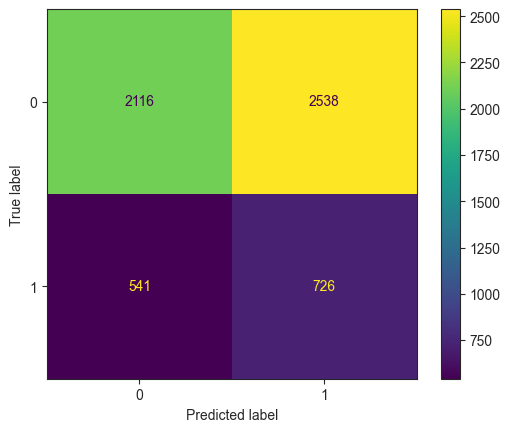

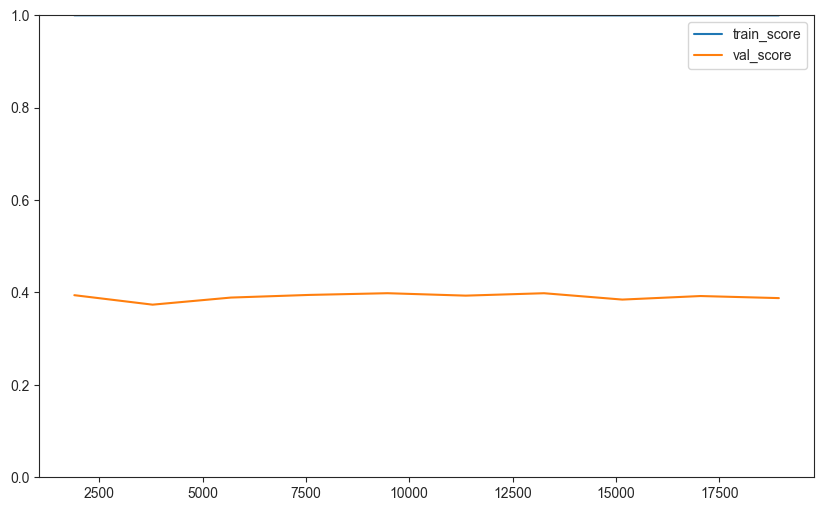

In [36]:
tree_model = DecisionTreeClassifier(random_state=0)
evaluation(tree_model)

### Random Forest

[[4483  171]
 [ 968  299]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      4654
           1       0.64      0.24      0.34      1267

    accuracy                           0.81      5921
   macro avg       0.73      0.60      0.62      5921
weighted avg       0.78      0.81      0.77      5921



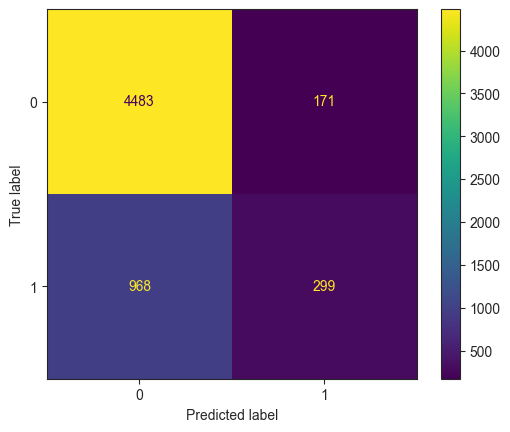

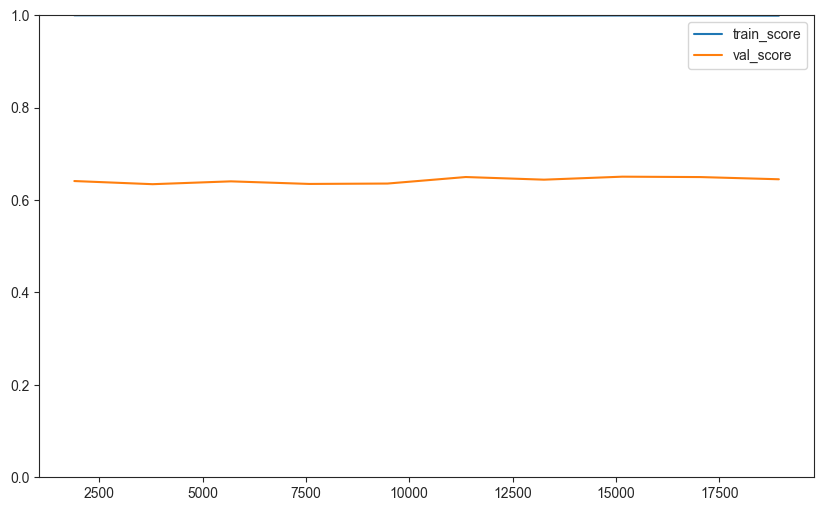

In [37]:
randforest_model = RandomForestClassifier(random_state=0)
evaluation(randforest_model)

In [38]:
randforest_model.feature_importances_

array([0.00874867, 0.00876811, 0.00870154, 0.00956414, 0.0076907 ,
       0.00033733, 0.0086348 , 0.00853984, 0.00195328, 0.05933938,
       0.06539529, 0.09425477, 0.04223613, 0.02755635, 0.02062009,
       0.01907396, 0.01744195, 0.05995521, 0.05365532, 0.05022111,
       0.04971701, 0.04885743, 0.05047967, 0.05279766, 0.04675167,
       0.04613483, 0.0430712 , 0.04378432, 0.04571822])

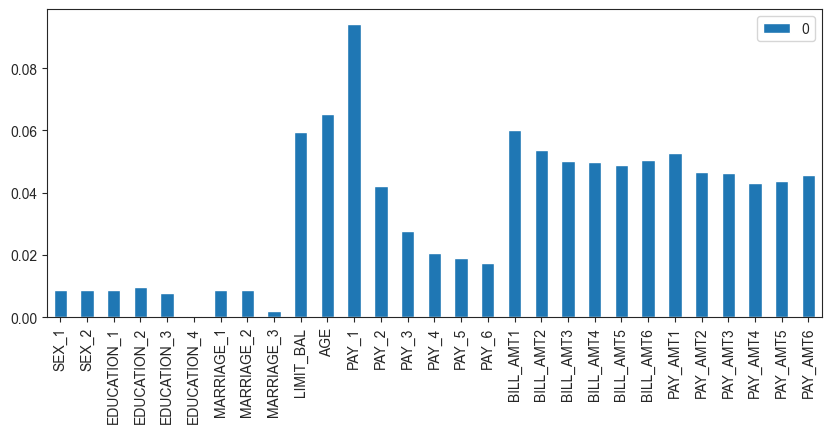

In [39]:
plt.rcParams["figure.figsize"] = (10,4)
pd.DataFrame(randforest_model.feature_importances_, index=X_train.columns).plot.bar()
plt.show()

### KNN (K-Nearest Neighbors)

[[4280  374]
 [ 841  426]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4654
           1       0.53      0.34      0.41      1267

    accuracy                           0.79      5921
   macro avg       0.68      0.63      0.64      5921
weighted avg       0.77      0.79      0.78      5921



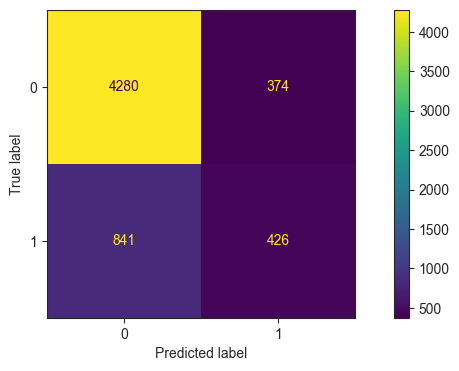

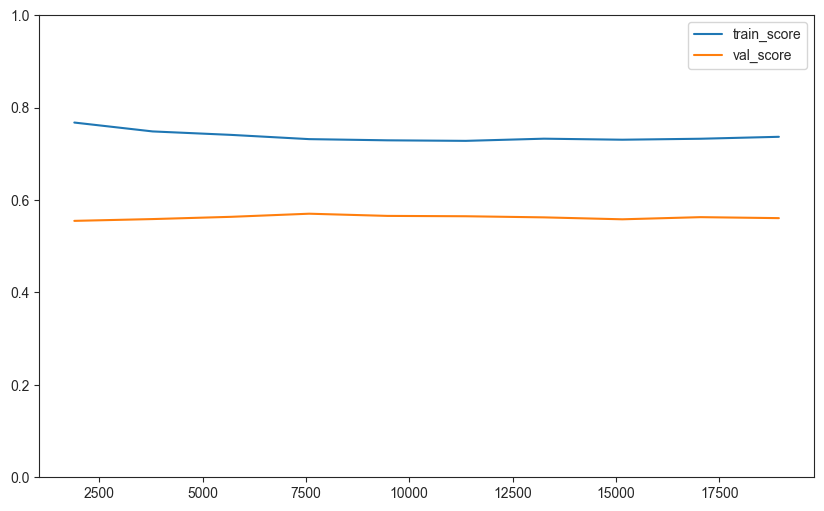

In [40]:
knn_model = KNeighborsClassifier()
evaluation(knn_model)

### Logistic regression 

[[4636   18]
 [1215   52]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4654
           1       0.74      0.04      0.08      1267

    accuracy                           0.79      5921
   macro avg       0.77      0.52      0.48      5921
weighted avg       0.78      0.79      0.71      5921



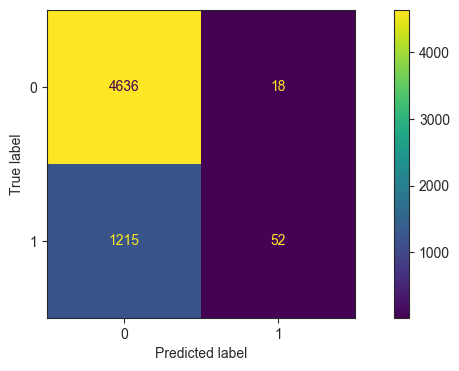

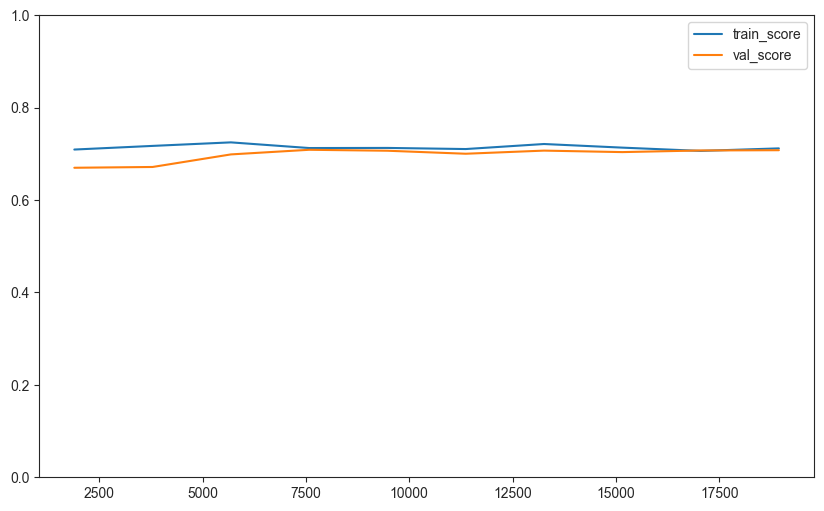

In [41]:
## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logistic_model = LogisticRegression(penalty=None, random_state=0)
evaluation(logistic_model)

### Ridge

[[4598   56]
 [1112  155]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      4654
           1       0.73      0.12      0.21      1267

    accuracy                           0.80      5921
   macro avg       0.77      0.56      0.55      5921
weighted avg       0.79      0.80      0.74      5921



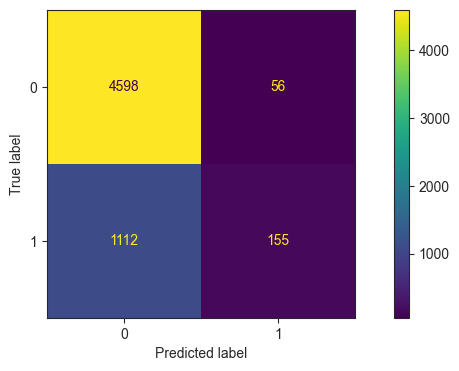

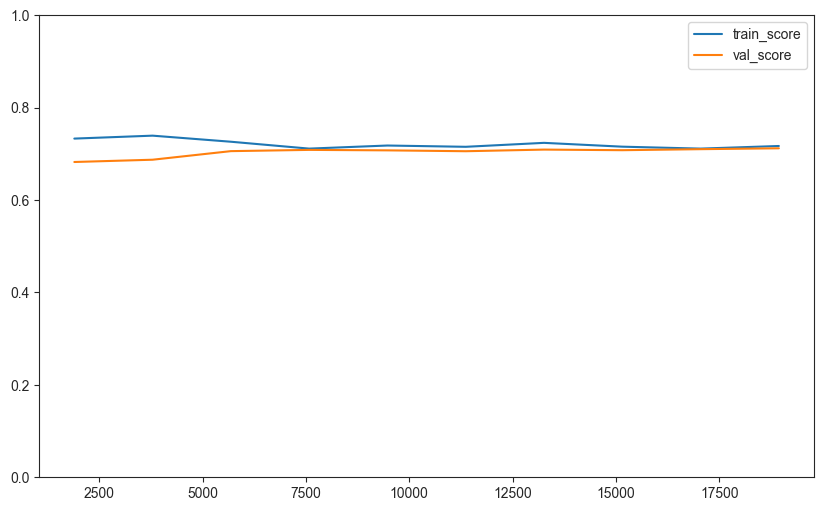

In [42]:
## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
ridge_model = LogisticRegression(penalty='l2', random_state=0)
evaluation(ridge_model)

### Lasso

[[4585   69]
 [1100  167]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      4654
           1       0.71      0.13      0.22      1267

    accuracy                           0.80      5921
   macro avg       0.76      0.56      0.55      5921
weighted avg       0.79      0.80      0.74      5921



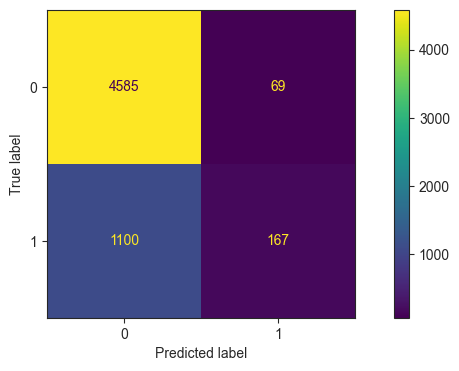

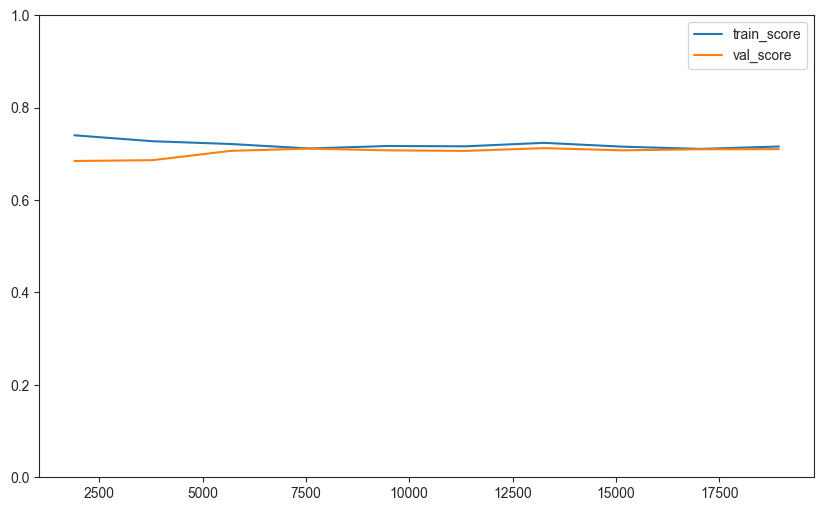

In [43]:
## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lasso_model = LogisticRegression(penalty='l1', solver='saga', random_state=0)
evaluation(lasso_model)

## Selection des features

[[4361  293]
 [ 803  464]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4654
           1       0.61      0.37      0.46      1267

    accuracy                           0.81      5921
   macro avg       0.73      0.65      0.67      5921
weighted avg       0.79      0.81      0.80      5921



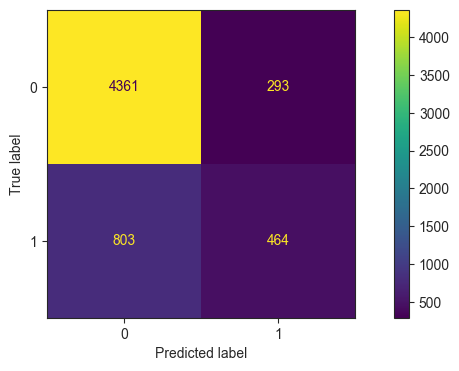

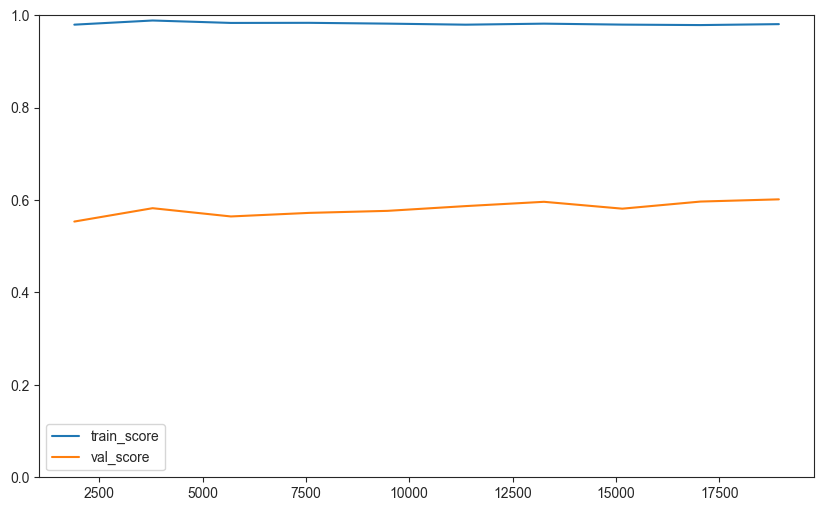

In [44]:
random_forest_model_select_features = make_pipeline(
    SelectKBest(f_classif, k=10), 
    RandomForestClassifier(random_state=0)
)
evaluation(random_forest_model_select_features)

On réessaye avec K=5

[[4406  248]
 [ 815  452]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4654
           1       0.65      0.36      0.46      1267

    accuracy                           0.82      5921
   macro avg       0.74      0.65      0.68      5921
weighted avg       0.80      0.82      0.80      5921



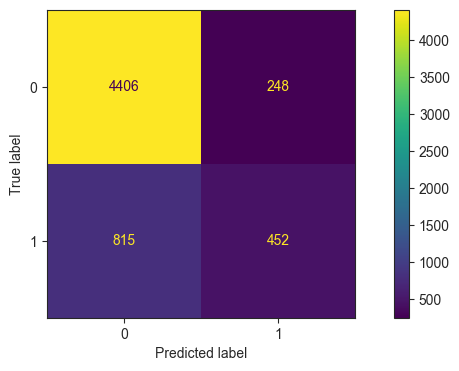

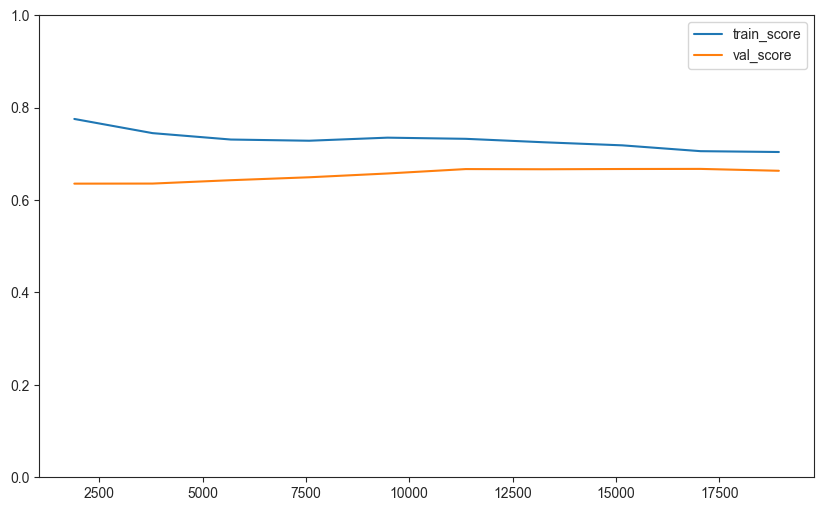

In [45]:
random_forest_model_select_features = make_pipeline(
    SelectKBest(f_classif, k=5), 
    RandomForestClassifier(random_state=0)
)
 
evaluation(random_forest_model_select_features)

On réessaye avec K=3

[[4471  183]
 [ 840  427]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4654
           1       0.70      0.34      0.45      1267

    accuracy                           0.83      5921
   macro avg       0.77      0.65      0.68      5921
weighted avg       0.81      0.83      0.80      5921



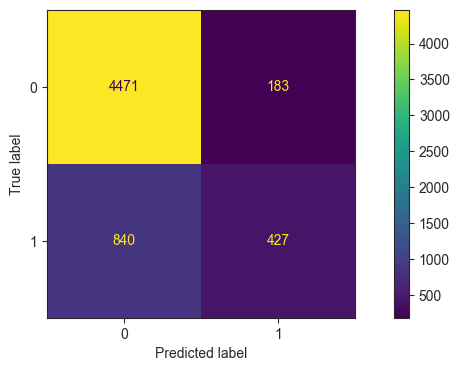

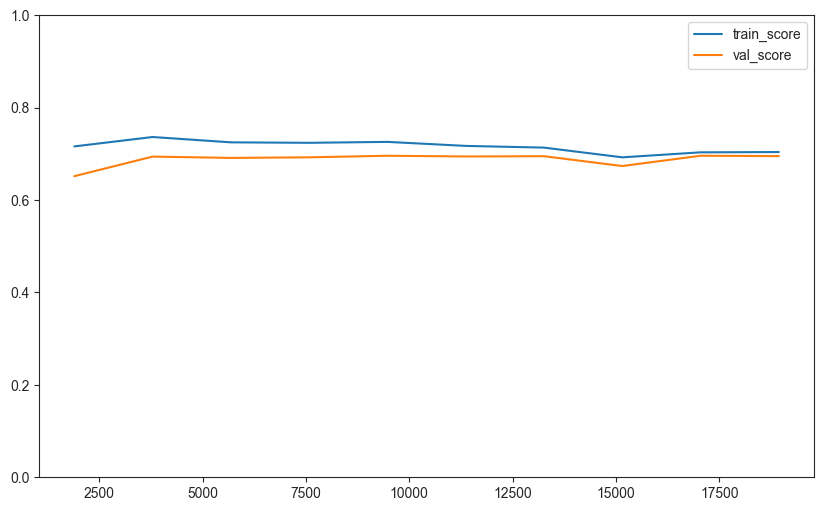

In [46]:
random_forest_model_select_features = make_pipeline(
    SelectKBest(f_classif, k=3), 
    RandomForestClassifier(random_state=0)
)
 
evaluation(random_forest_model_select_features)

In [47]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=5))

# On laisse les modèles sur leurs hyperpramètres de base
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
LogisticRegression = make_pipeline(preprocessor, LogisticRegression(random_state=0))
SVC = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

list_of_models = {'RandomForest':RandomForest,
                  'LogisticRegression':LogisticRegression,
                  'SVC':SVC,
                  'KNN':KNN}

******************************************************************************************
RandomForest
******************************************************************************************
[[4432  222]
 [ 828  439]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4654
           1       0.66      0.35      0.46      1267

    accuracy                           0.82      5921
   macro avg       0.75      0.65      0.67      5921
weighted avg       0.80      0.82      0.80      5921



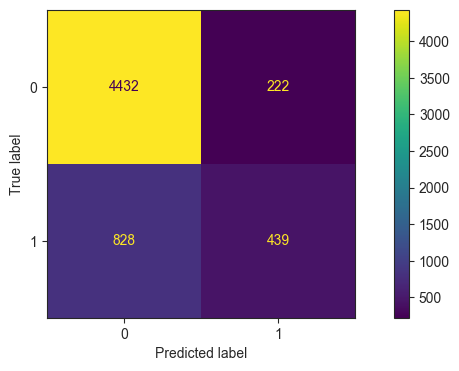

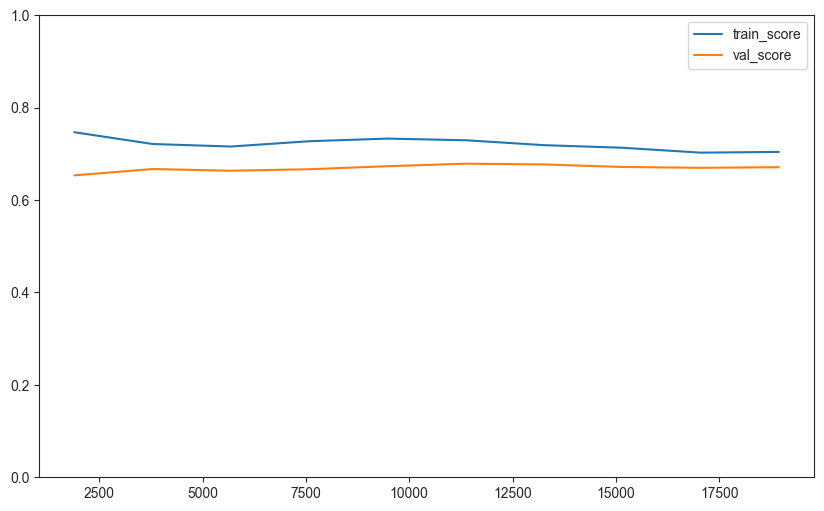

******************************************************************************************
LogisticRegression
******************************************************************************************
[[4506  148]
 [ 880  387]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4654
           1       0.72      0.31      0.43      1267

    accuracy                           0.83      5921
   macro avg       0.78      0.64      0.66      5921
weighted avg       0.81      0.83      0.80      5921



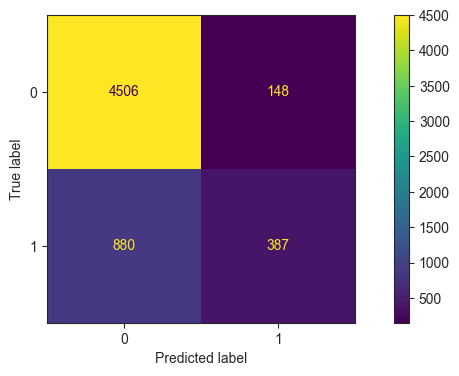

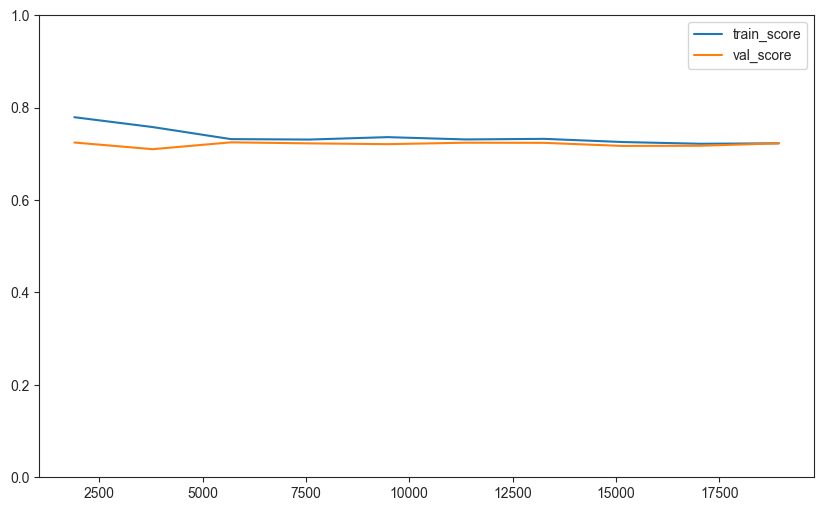

******************************************************************************************
SVC
******************************************************************************************
[[4430  224]
 [ 799  468]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4654
           1       0.68      0.37      0.48      1267

    accuracy                           0.83      5921
   macro avg       0.76      0.66      0.69      5921
weighted avg       0.81      0.83      0.81      5921



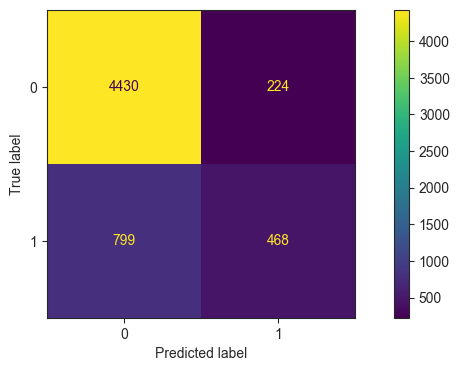

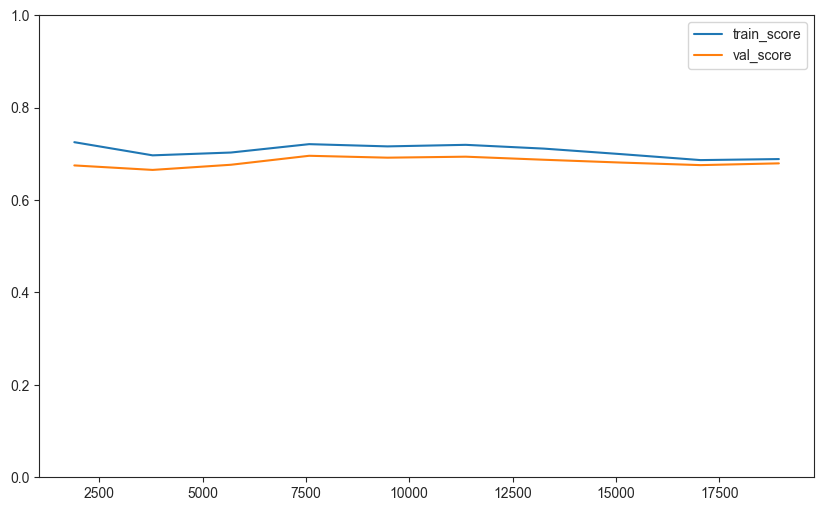

******************************************************************************************
KNN
******************************************************************************************
[[4134  520]
 [ 730  537]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4654
           1       0.51      0.42      0.46      1267

    accuracy                           0.79      5921
   macro avg       0.68      0.66      0.67      5921
weighted avg       0.78      0.79      0.78      5921



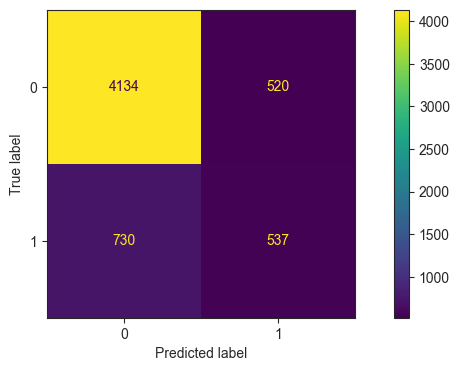

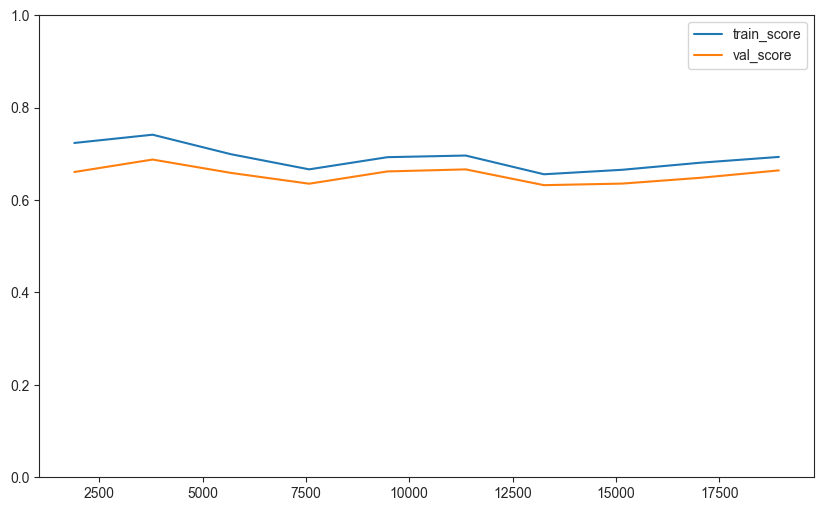

In [48]:
for name, model in list_of_models.items():
    print('*' *90)
    print(name)
    print('*' *90)
    evaluation(model)

<a id="section4"></a>
# 4. Hyper-optimisation

Maintenant qu'on a fait une première évaluation de nos modèles, on va essayer de les optimiser

In [49]:
for name, model in list_of_models.items():
    print('*' *90)
    print(name)
    print('*' *90)
    print(cross_val_score(model, X_train, y_train, cv=5, scoring='precision').mean())
    print('\n')


******************************************************************************************
RandomForest
******************************************************************************************
0.6711584297023936


******************************************************************************************
LogisticRegression
******************************************************************************************
0.7228241851450747


******************************************************************************************
SVC
******************************************************************************************
0.6794801890481533


******************************************************************************************
KNN
******************************************************************************************
0.6642490959327922




### SVC

In [50]:
SVC

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=5))])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

Best configuration found for SVC:
{'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'poly'}
Val precision:   0.784017094017094
[[4647    7]
 [1251   16]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4654
           1       0.70      0.01      0.02      1267

    accuracy                           0.79      5921
   macro avg       0.74      0.51      0.45      5921
weighted avg       0.77      0.79      0.70      5921



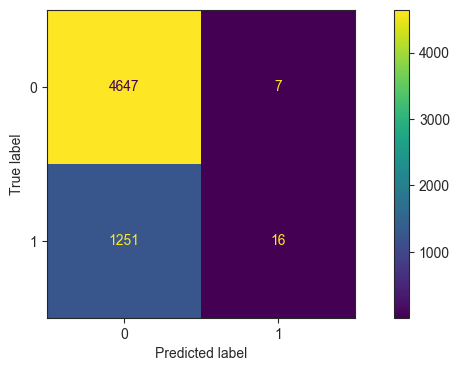

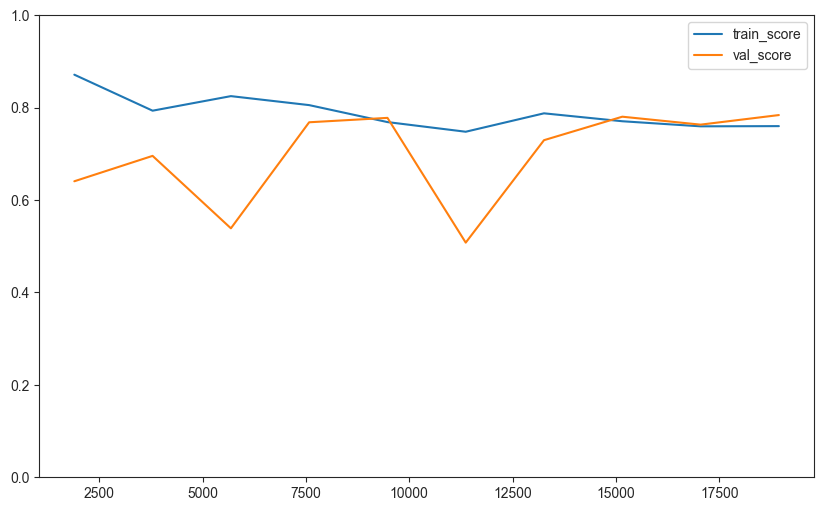

In [51]:
param = {
    'C': [10, 100, 200, 500],
      'kernel': ['rbf', 'poly'],
      'gamma': [0.0001, 0.001, 0.01]
}
hyper_params = {'svc__' + key: param[key] for key in param}

kf = StratifiedKFold(n_splits=5)

grid_SVC = GridSearchCV(SVC, param_grid=hyper_params, cv=kf, scoring='precision', n_jobs=16, return_train_score=True)

grid_SVC.fit(X_train, y_train)

y_pred = grid_SVC.predict(X_test)

print("Best configuration found for SVC:")
print(grid_SVC.best_params_)
print(f"Val precision:   {grid_SVC.best_score_}")

evaluation(grid_SVC.best_estimator_)

### Random Forest

In [52]:
RandomForest

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=5))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

Best configuration found for RandomForestClassifier():
{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 1, 'randomforestclassifier__oob_score': True}
Val precision:   0.6774333310881635
[[4479  175]
 [ 874  393]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4654
           1       0.69      0.31      0.43      1267

    accuracy                           0.82      5921
   macro avg       0.76      0.64      0.66      5921
weighted avg       0.81      0.82      0.80      5921



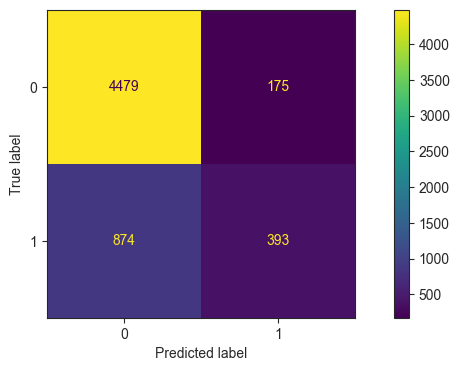

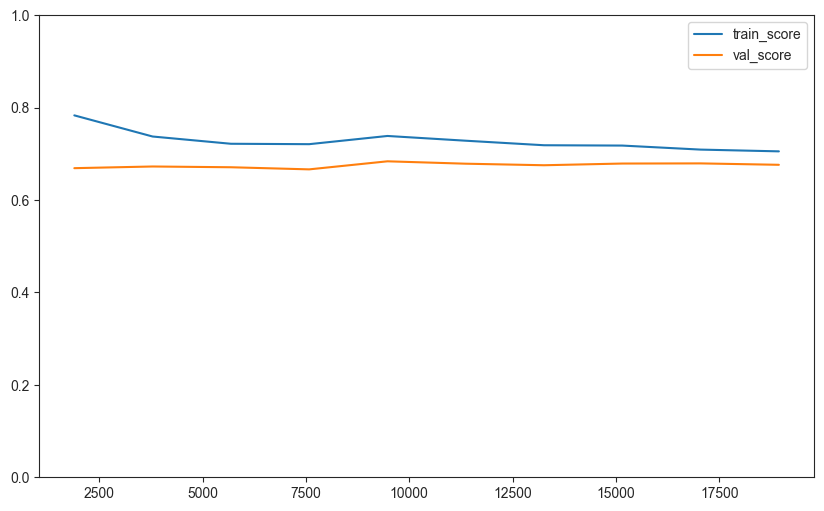

In [53]:
param = {
      "criterion":["gini", "entropy"],
      "max_features":[None, "sqrt"],
      "oob_score":[True],
      "n_estimators":[0.1, 1, 10, 50]
    }
hyper_params = {'randomforestclassifier__' + key: param[key] for key in param}

kf = StratifiedKFold(n_splits=5)

grid_randforest = GridSearchCV(RandomForest, param_grid=hyper_params, cv=kf, scoring='precision', n_jobs=16, return_train_score=True)

grid_randforest.fit(X_train, y_train)

y_pred = grid_randforest.predict(X_test)

print("Best configuration found for RandomForestClassifier():")
print(grid_randforest.best_params_)
print(f"Val precision:   {grid_randforest.best_score_}")

evaluation(grid_randforest)

### Logistic Regression

In [54]:
LogisticRegression

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=5))])),
                ('logisticregression', LogisticRegression(random_state=0))])

Best configuration found for LogisticRegression():
{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
Val precision:   0.7292307283431667
[[4563   91]
 [1014  253]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4654
           1       0.74      0.20      0.31      1267

    accuracy                           0.81      5921
   macro avg       0.78      0.59      0.60      5921
weighted avg       0.80      0.81      0.77      5921



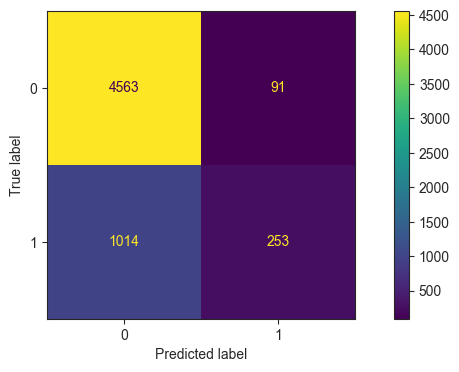

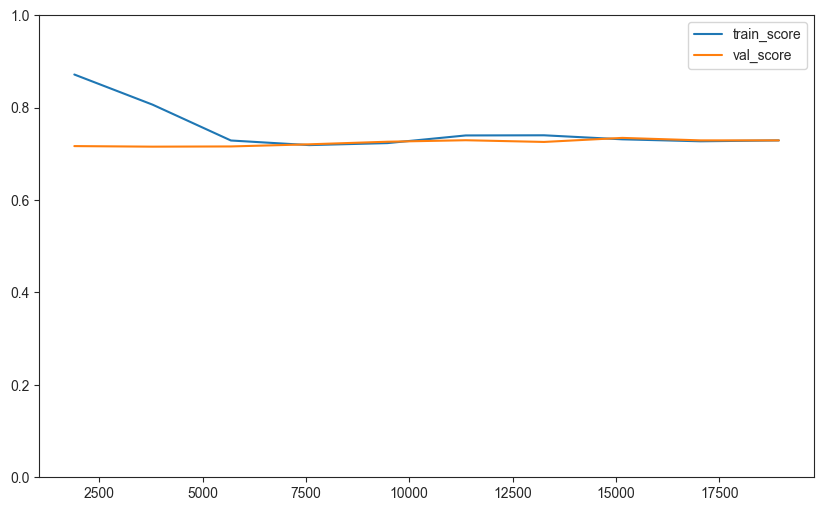

In [55]:
param = {
        "C":[0.0001, 0.001, 0.01, 0.1, 1, 10],
        "penalty" : ['l1', 'l2', 'elasticnet', None]

    }
hyper_params = {'logisticregression__' + key: param[key] for key in param}

kf = StratifiedKFold(n_splits=5)

grid_logisticR = GridSearchCV(LogisticRegression, param_grid=hyper_params, cv=kf, scoring='precision', n_jobs=16, return_train_score=True)

grid_logisticR.fit(X_train, y_train)

y_pred = grid_logisticR.predict(X_test)

print("Best configuration found for LogisticRegression():")
print(grid_logisticR.best_params_)
print(f"Val precision:   {grid_logisticR.best_score_}")

evaluation(grid_logisticR.best_estimator_)

### KNN

In [56]:
KNN

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=5))])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Best configuration found for KNeighborsClassifier() :
{'kneighborsclassifier__n_neighbors': 100}
Val precision:   0.6953874733712573
[[4487  167]
 [ 848  419]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4654
           1       0.72      0.33      0.45      1267

    accuracy                           0.83      5921
   macro avg       0.78      0.65      0.68      5921
weighted avg       0.81      0.83      0.80      5921



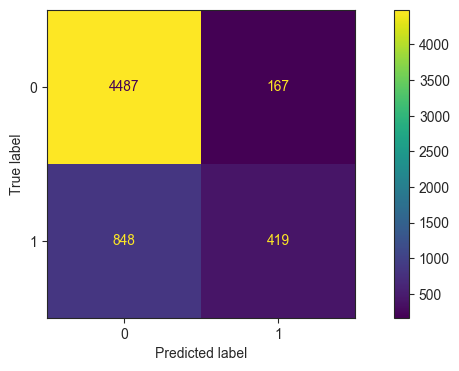

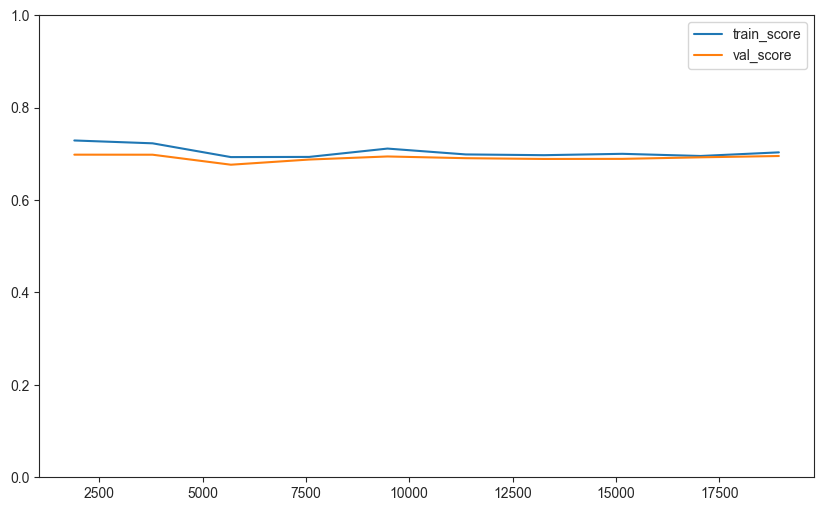

In [57]:
param = {
        "n_neighbors":[10, 100, 400, 500, 800]
    }
hyper_params = {'kneighborsclassifier__' + key: param[key] for key in param}

kf = StratifiedKFold(n_splits=5)

grid_KNN = GridSearchCV(KNN, param_grid=hyper_params, cv=kf, scoring='precision', n_jobs=16, return_train_score=True)

grid_KNN.fit(X_train, y_train)

y_pred = grid_KNN.predict(X_test)

print("Best configuration found for KNeighborsClassifier() :")
print(grid_KNN.best_params_)
print(f"Val precision:   {grid_KNN.best_score_}")

evaluation(grid_KNN.best_estimator_)